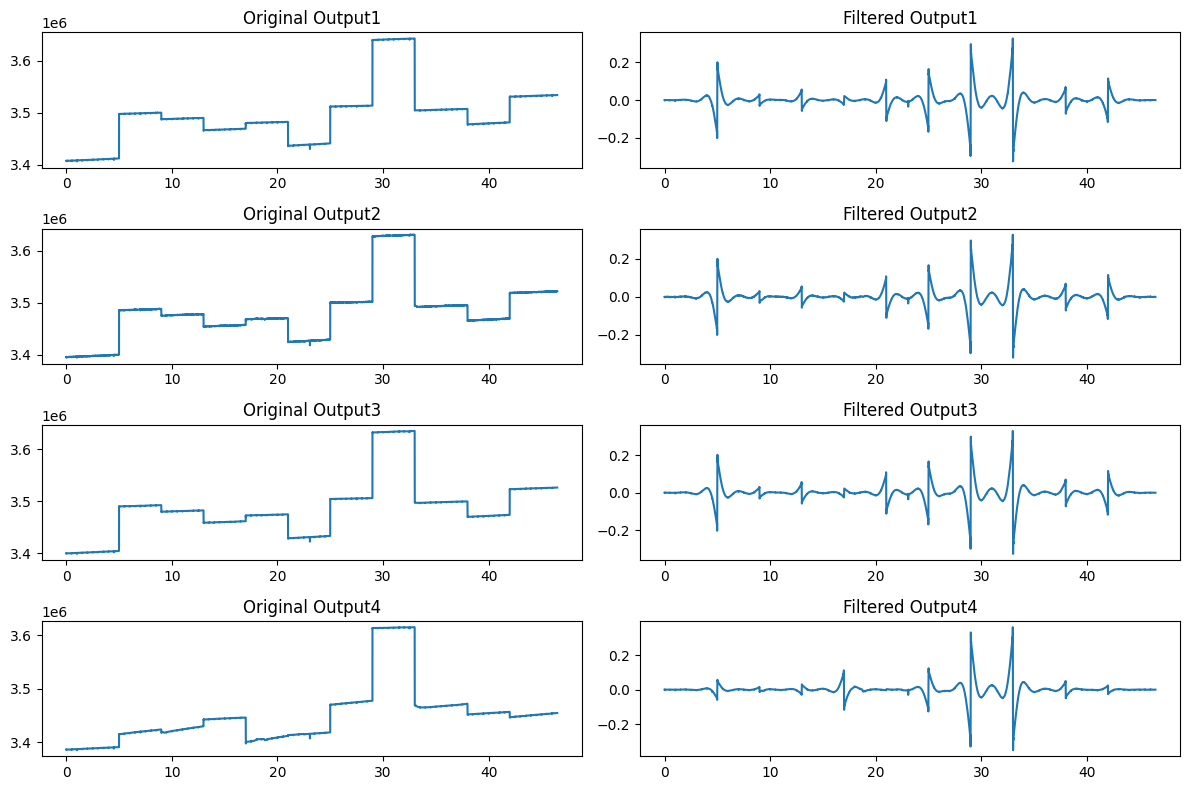

In [6]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the EEG data from the provided files
file_0 = pd.read_excel('/content/0.xlsx')
file_1 = pd.read_excel('/content/1.xlsx')
file_2 = pd.read_excel('/content/2.xlsx')
file_3 = pd.read_excel('/content/3.xlsx')
file_4 = pd.read_excel('/content/4.xlsx')
file_5 = pd.read_excel('/content/5.xlsx')
file_6 = pd.read_excel('/content/6.xlsx')
file_7 = pd.read_excel('/content/7.xlsx')
file_8 = pd.read_excel('/content/8.xlsx')
file_9 = pd.read_excel('/content/9.xlsx')
file_N = pd.read_excel('/content/N.xlsx')

# Combine the data from the three files
combined_data = pd.concat([file_0, file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, file_N], ignore_index=True)
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the DataFrame
normalized_data = scaler.fit_transform(combined_data)

# Create a new DataFrame with the normalized data
normalized_df= pd.DataFrame(normalized_data)
# Function to create a Butterworth band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the filter
def apply_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y

# Filter parameters
fs = 256  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Apply band-pass filter to each channel
filtered_data = apply_filter(normalized_data, lowcut, highcut, fs)

# Plot original and filtered data for each channel
time = np.arange(filtered_data.shape[0]) / fs  # Time vector

plt.figure(figsize=(12, 8))
for i, column in enumerate(combined_data.columns, 1):
    plt.subplot(4, 2, 2*i-1)
    plt.plot(time, combined_data[column])
    plt.title(f'Original {column}')
    plt.subplot(4, 2, 2*i)
    plt.plot(time, filtered_data[:, i-1])
    plt.title(f'Filtered {column}')

plt.tight_layout()
plt.show()


In [8]:
print(len(combined_data))

11904


In [9]:

combined_data.head()

Output1  Output2  Output3  Output4
0  3407152  3395210  3400169  3385836
1  3406792  3394824  3399769  3385431
2  3406404  3394509  3399404  3385058
3  3406927  3395089  3399952  3385606
4  3407021  3395007  3400004  3385663

In [10]:
normalized_df.head()

0         1         2         3
0  0.004227  0.004296  0.004257  0.004305
1  0.002704  0.002664  0.002565  0.002549
2  0.001062  0.001332  0.001020  0.000932
3  0.003275  0.003785  0.003339  0.003308
4  0.003673  0.003438  0.003559  0.003555

In [11]:
signal  =filtered_data

In [11]:
print(signal)

[[ 3.65602472e-05 -3.06626174e-04 -1.93156848e-05 -1.62277436e-04]
 [-7.33159360e-04 -1.08481333e-03 -8.28062176e-04 -1.00903463e-03]
 [-1.24180147e-03 -1.60513261e-03 -1.36546297e-03 -1.57342536e-03]
 ...
 [ 8.87985064e-06 -1.93465601e-04 -4.29344842e-05 -1.34825708e-04]
 [ 1.16226192e-05 -1.59953092e-04 -4.92398001e-05 -1.30198178e-04]
 [ 1.14988507e-05 -1.12273821e-04 -5.69365243e-05 -1.27084103e-04]]


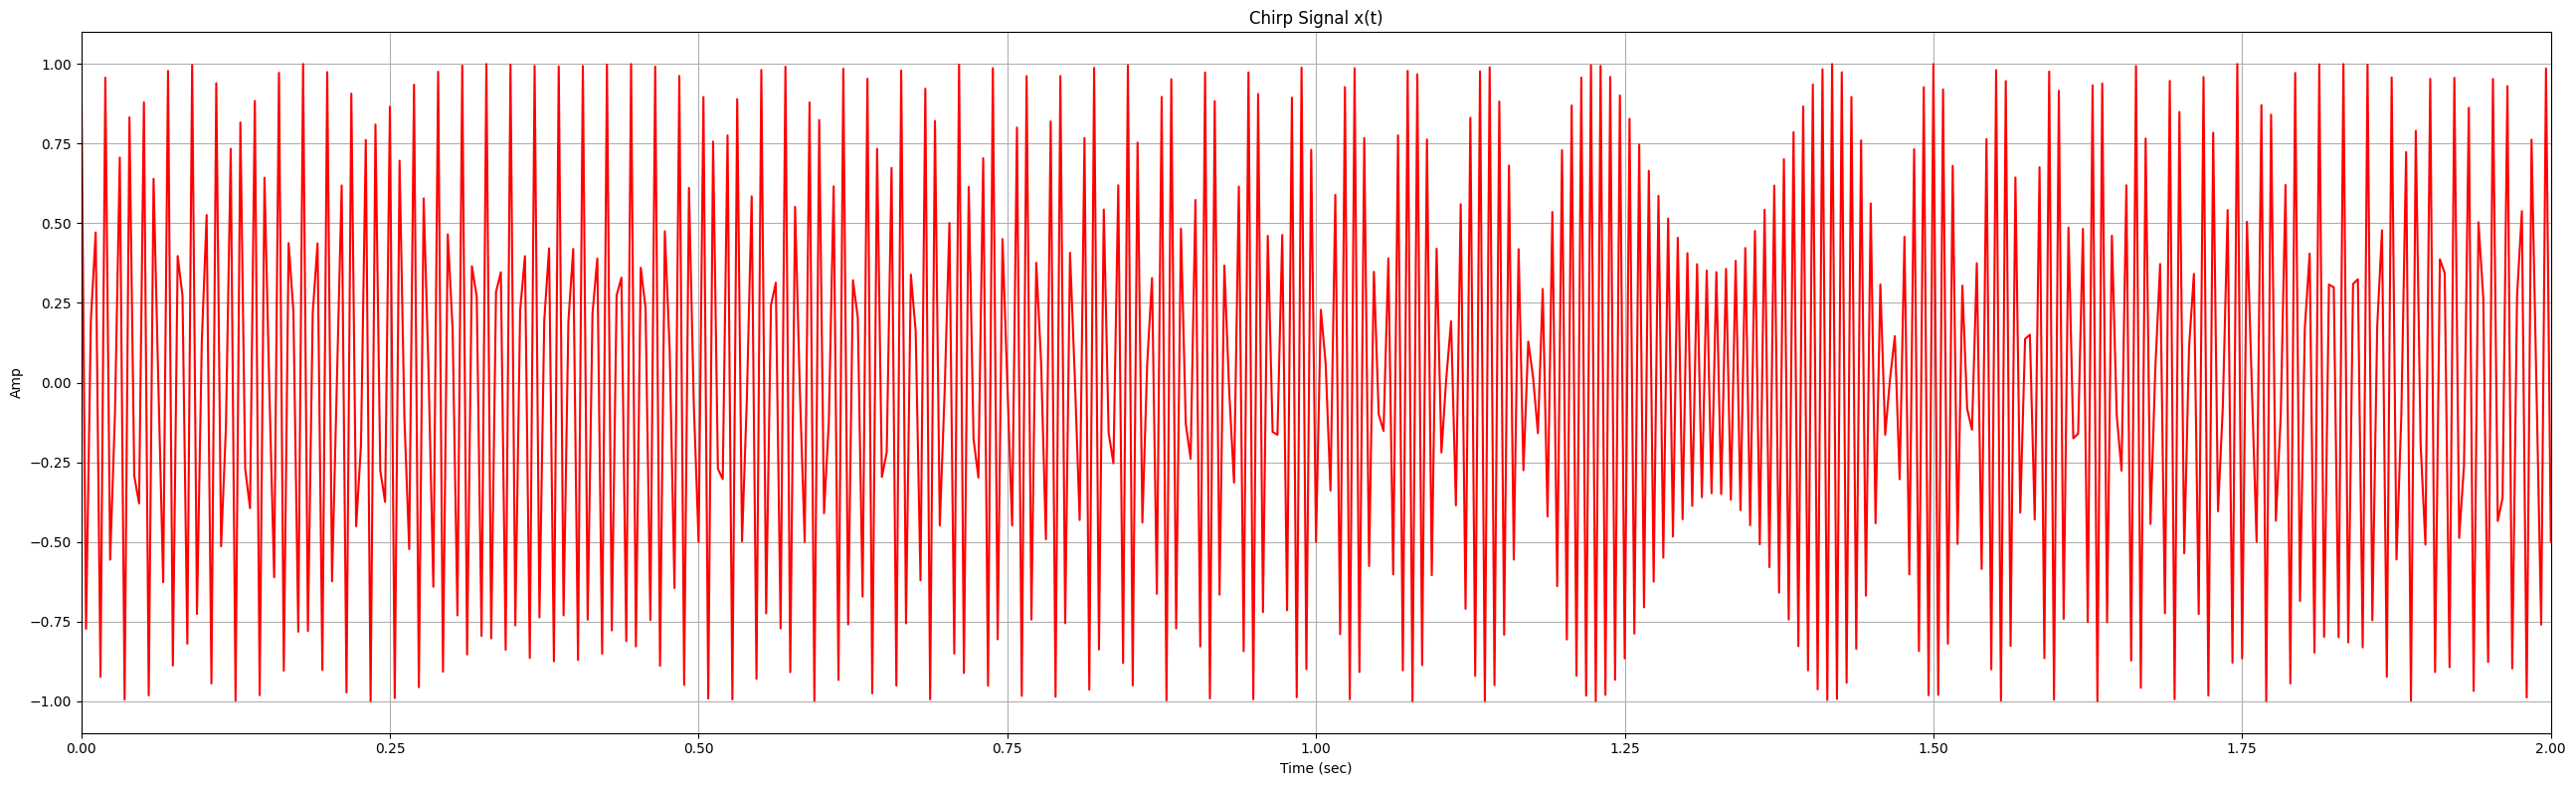

In [12]:
# part a
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, get_window, spectrogram

T = 5.0  # sec
fs = 256 # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()


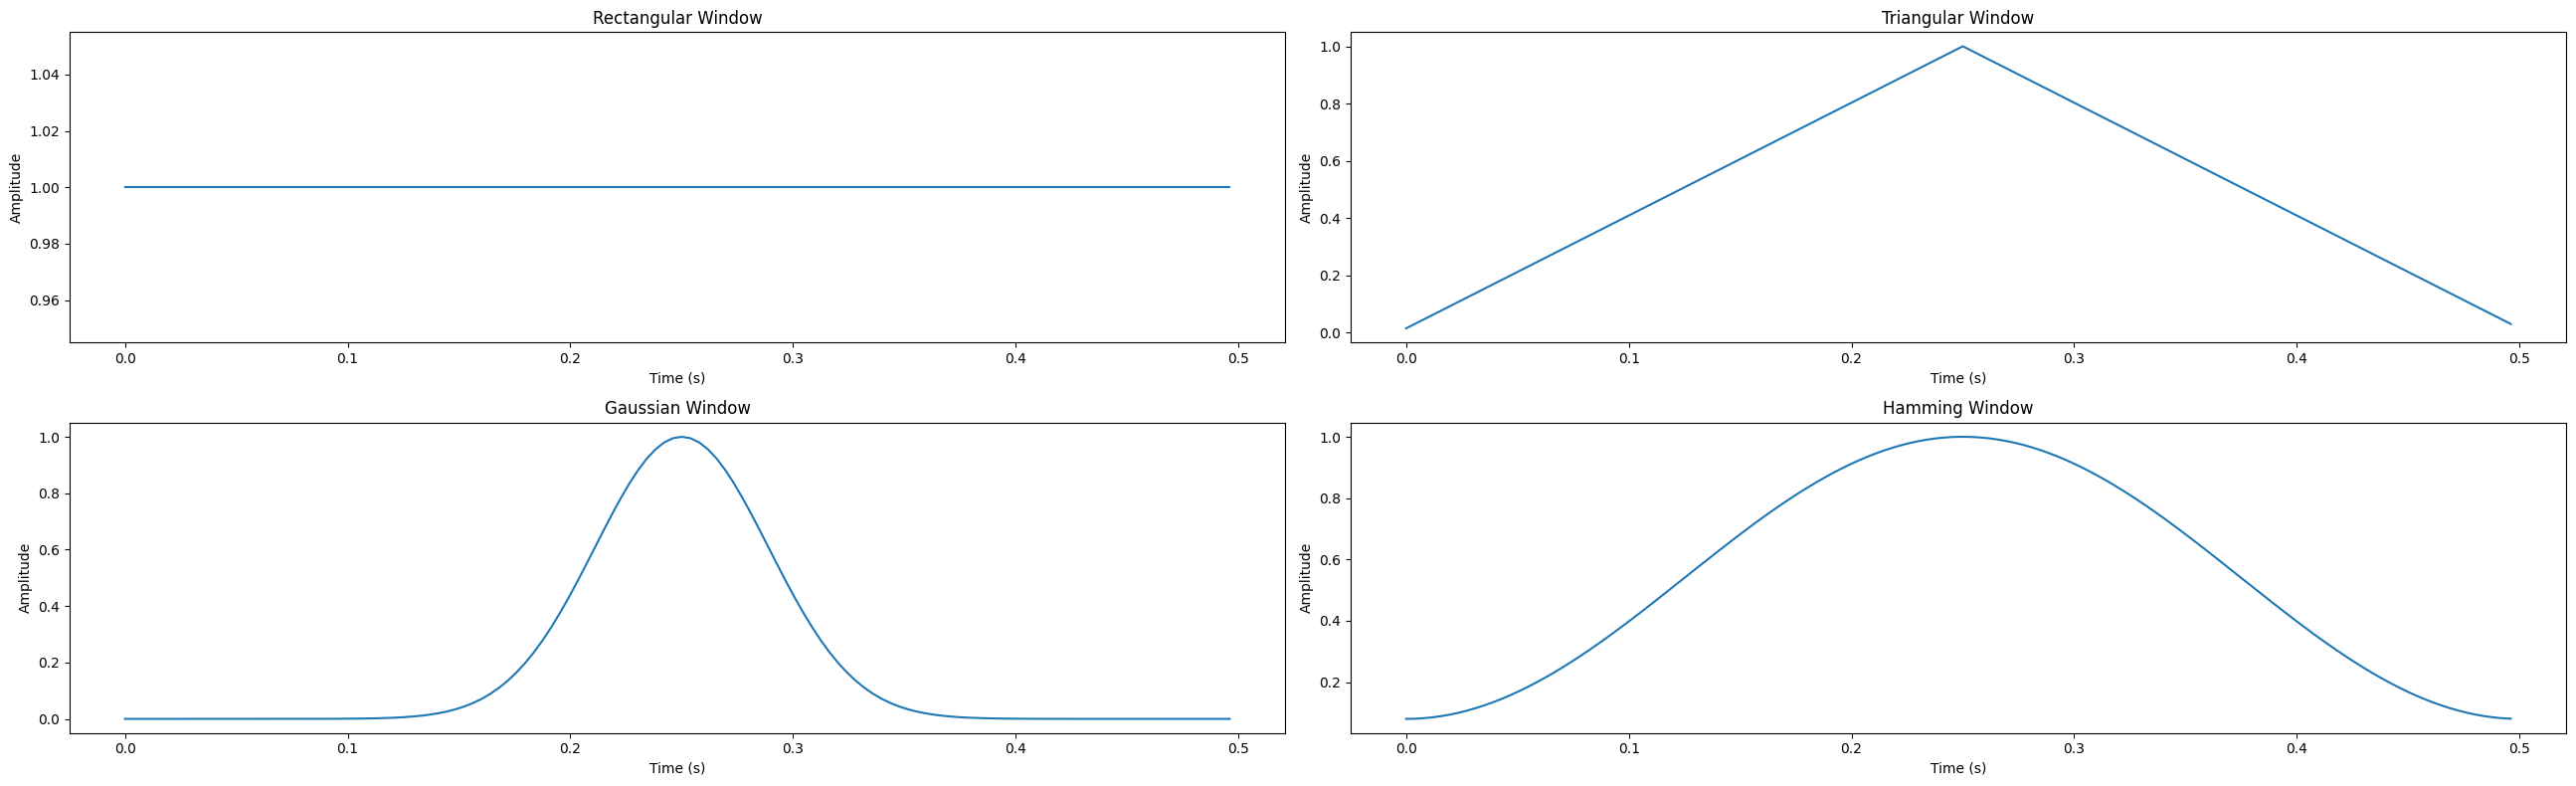

In [13]:
L = 128
fs = 256  # Hz
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

<ipython-input-14-3342e2c9f77b>:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


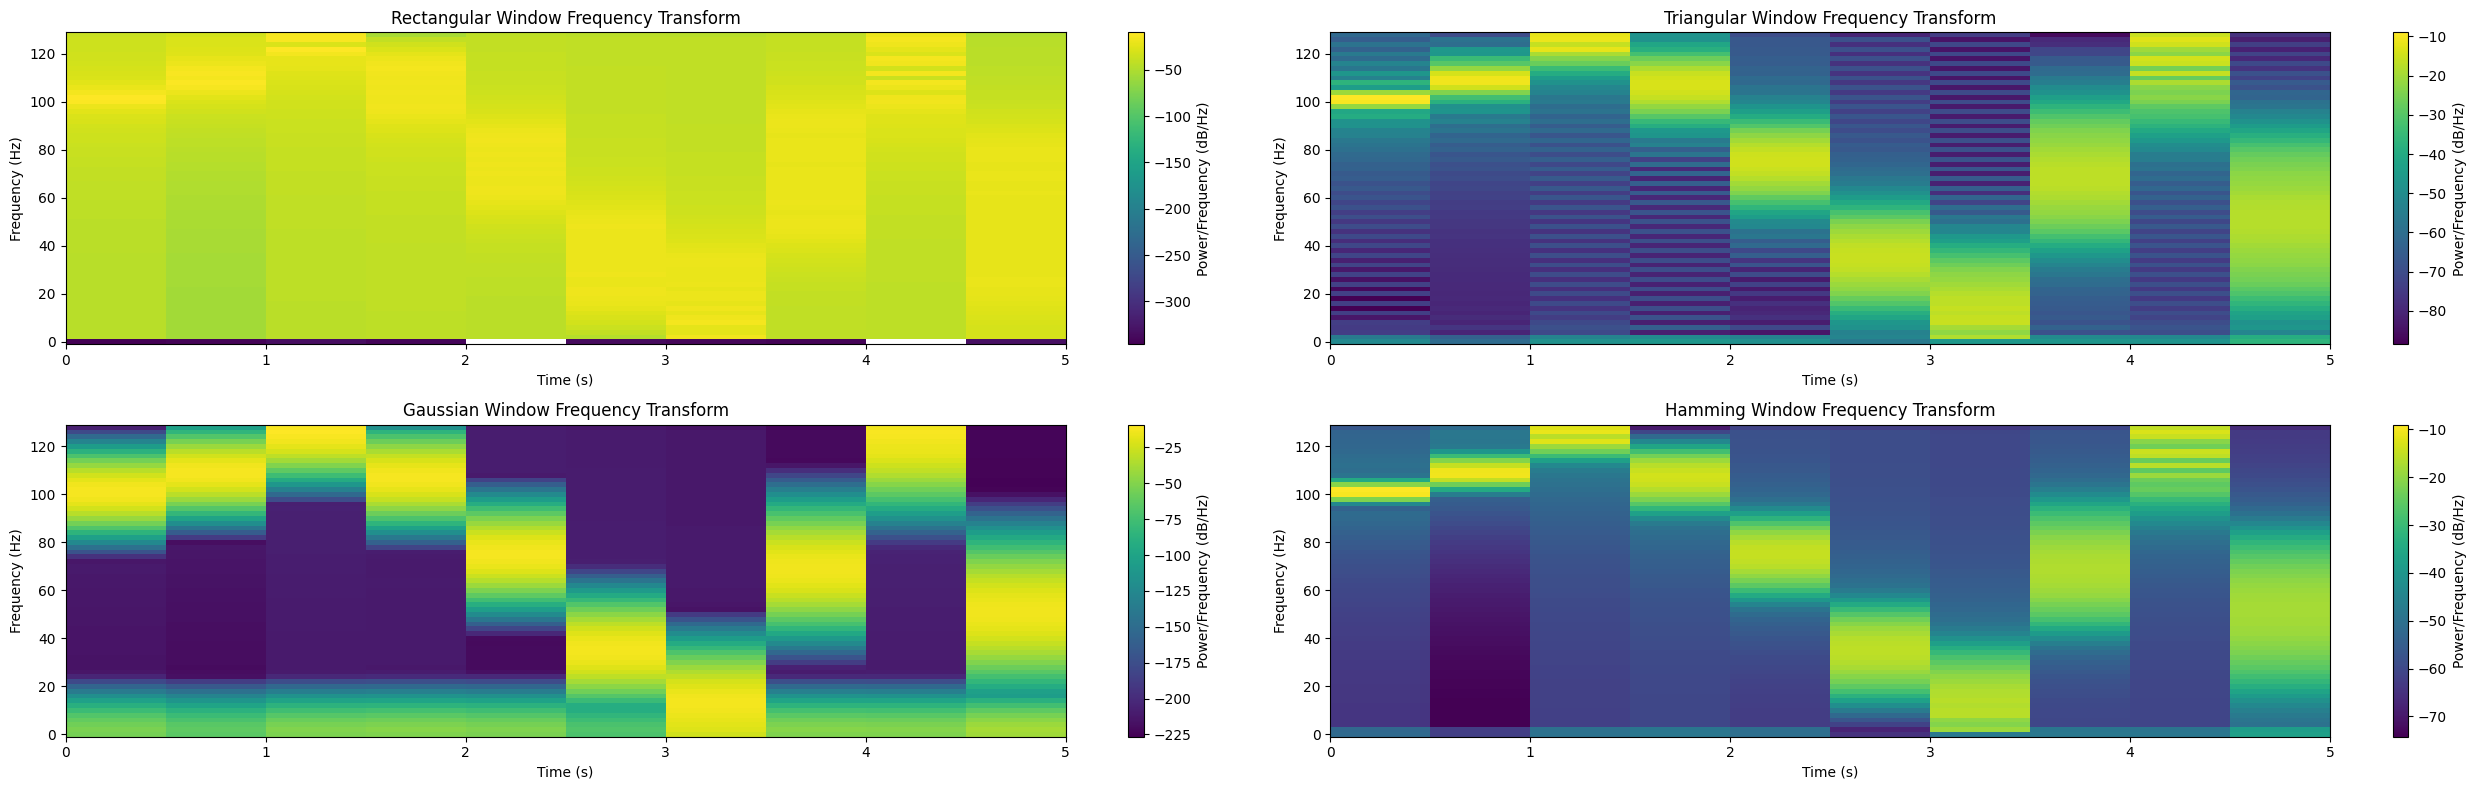

In [14]:
#part c
noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()


<ipython-input-15-6db65da9e12d>:9: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


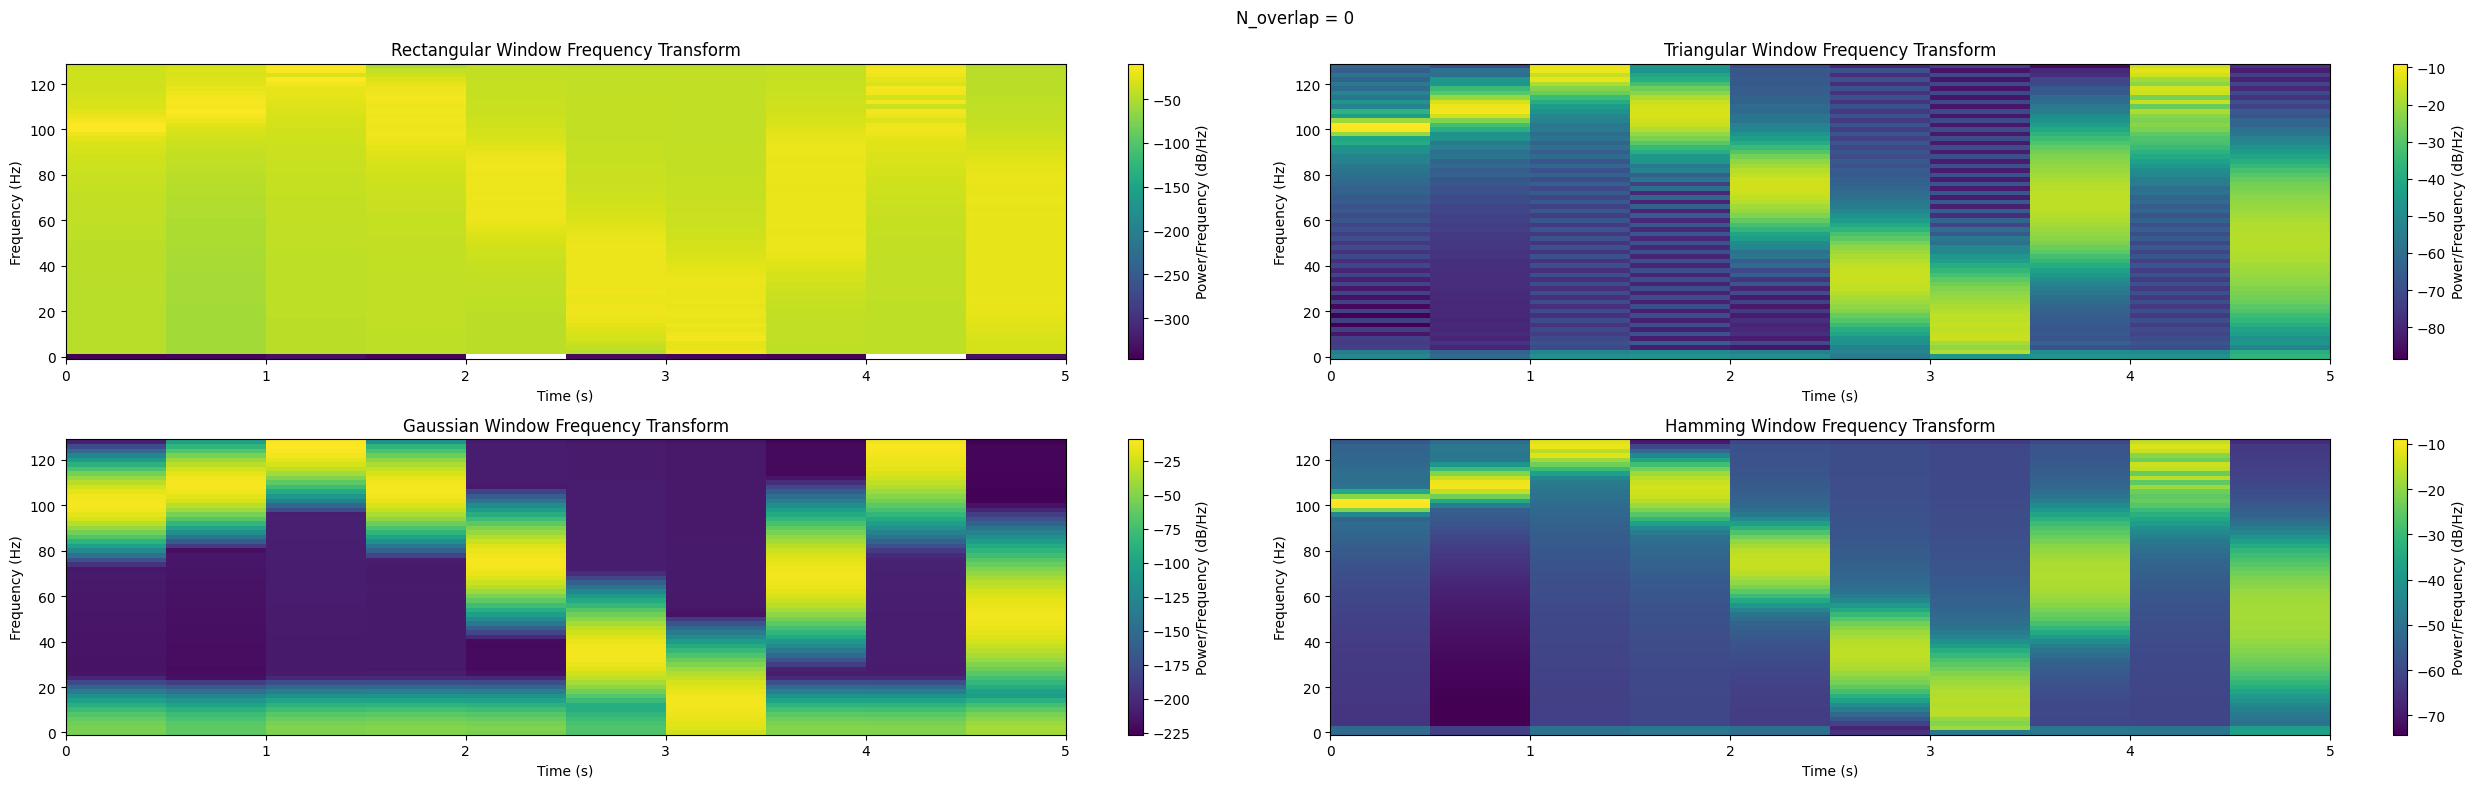

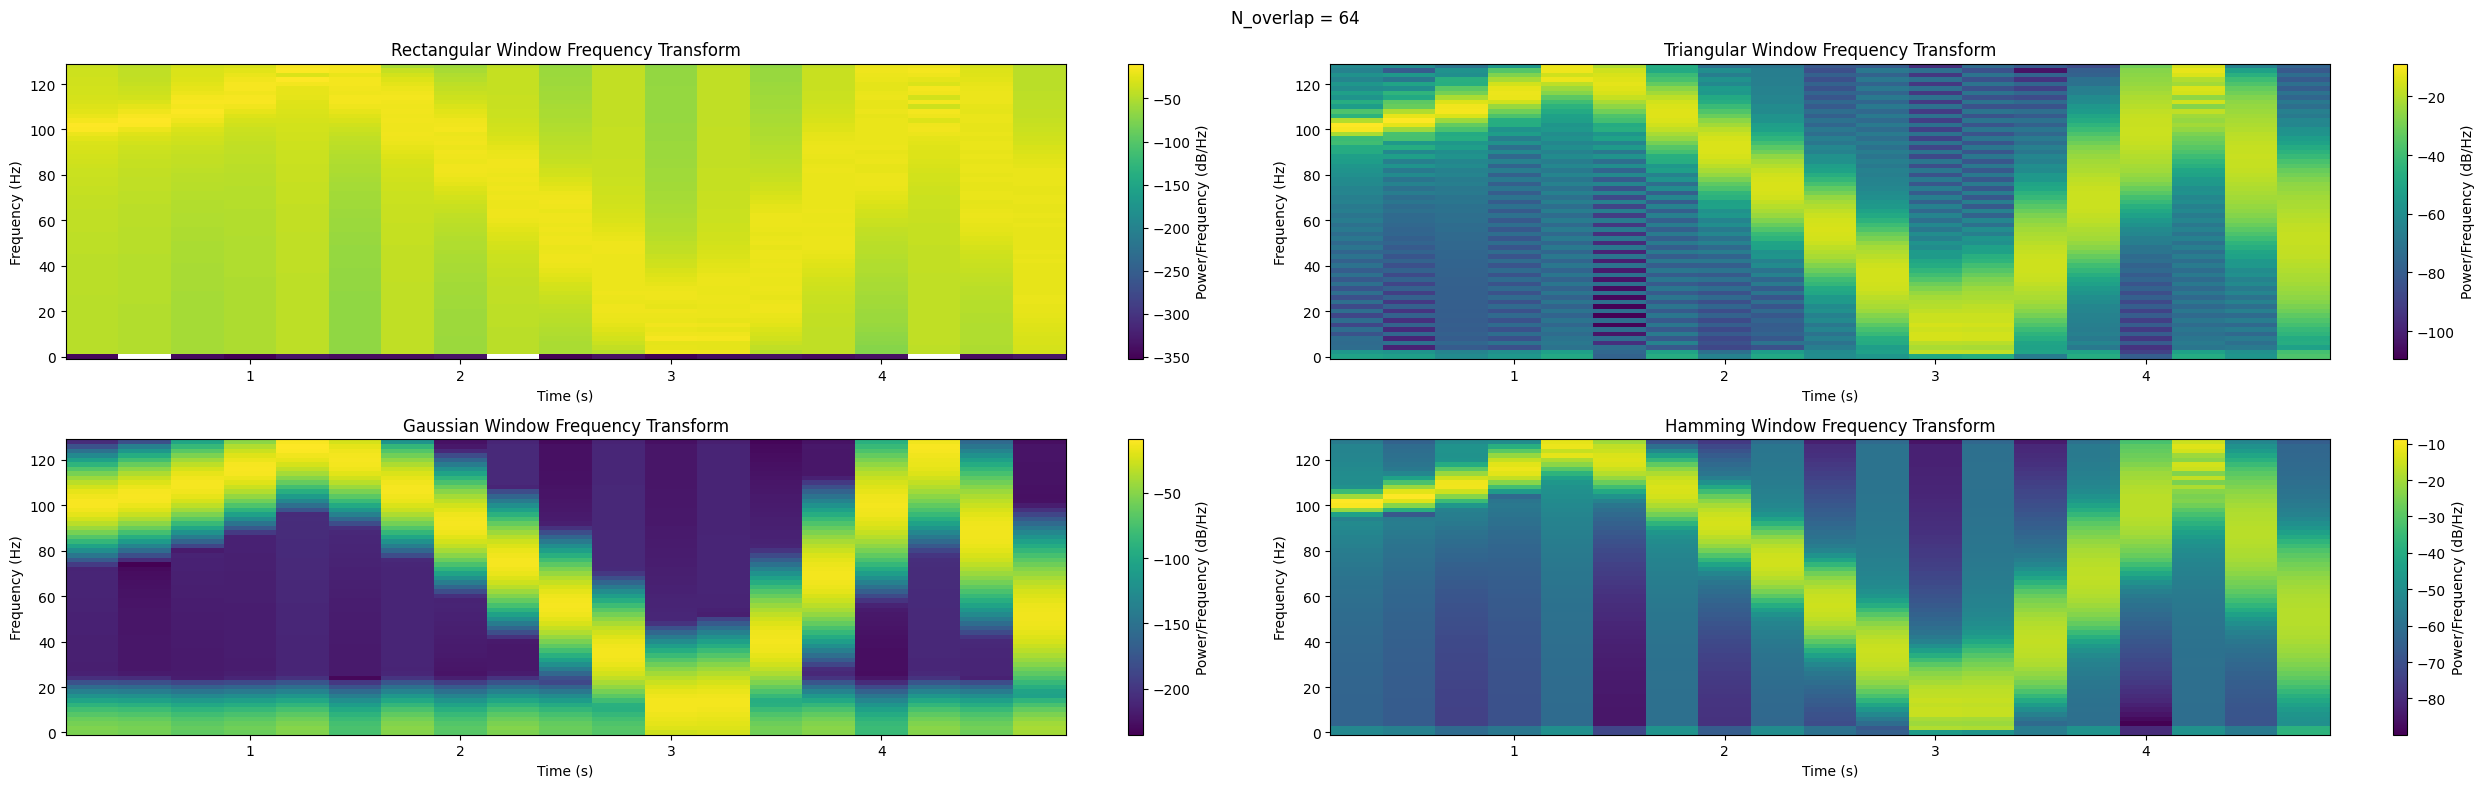

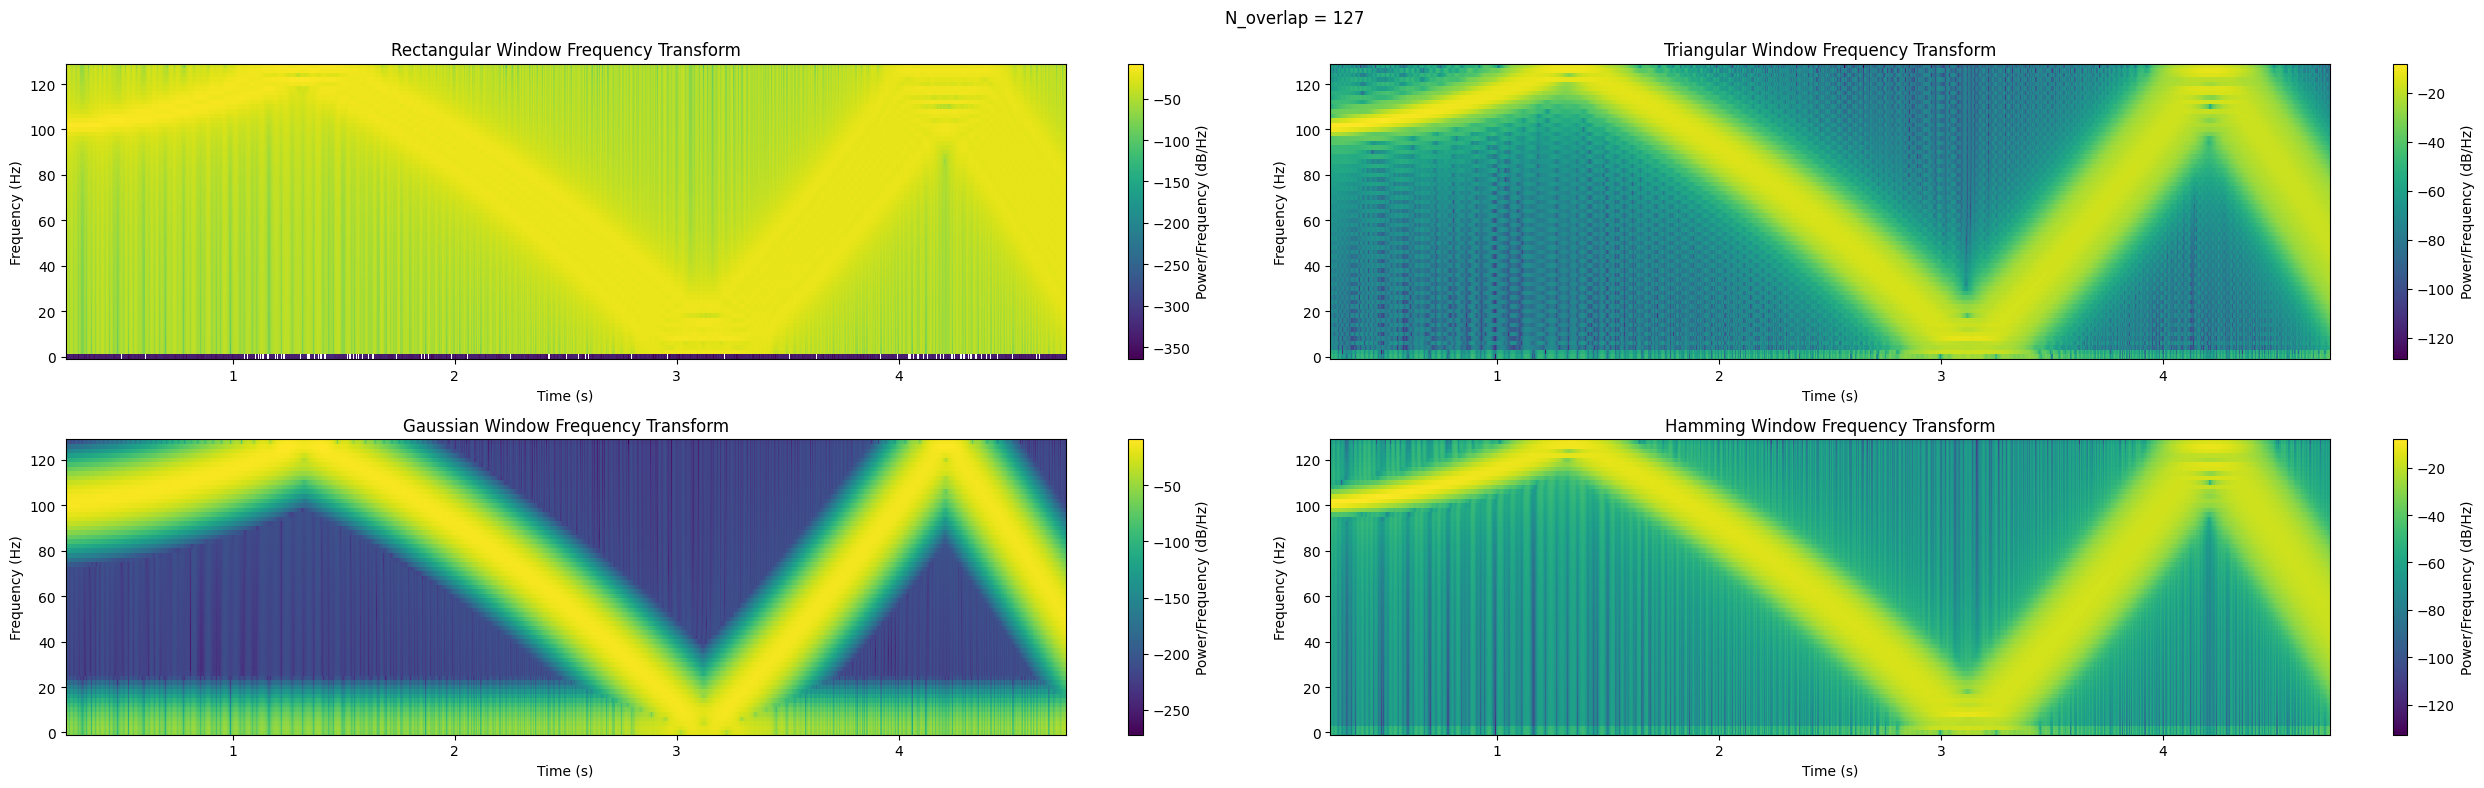

In [15]:
#%% part d
noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

<ipython-input-16-1cd81deda7c5>:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


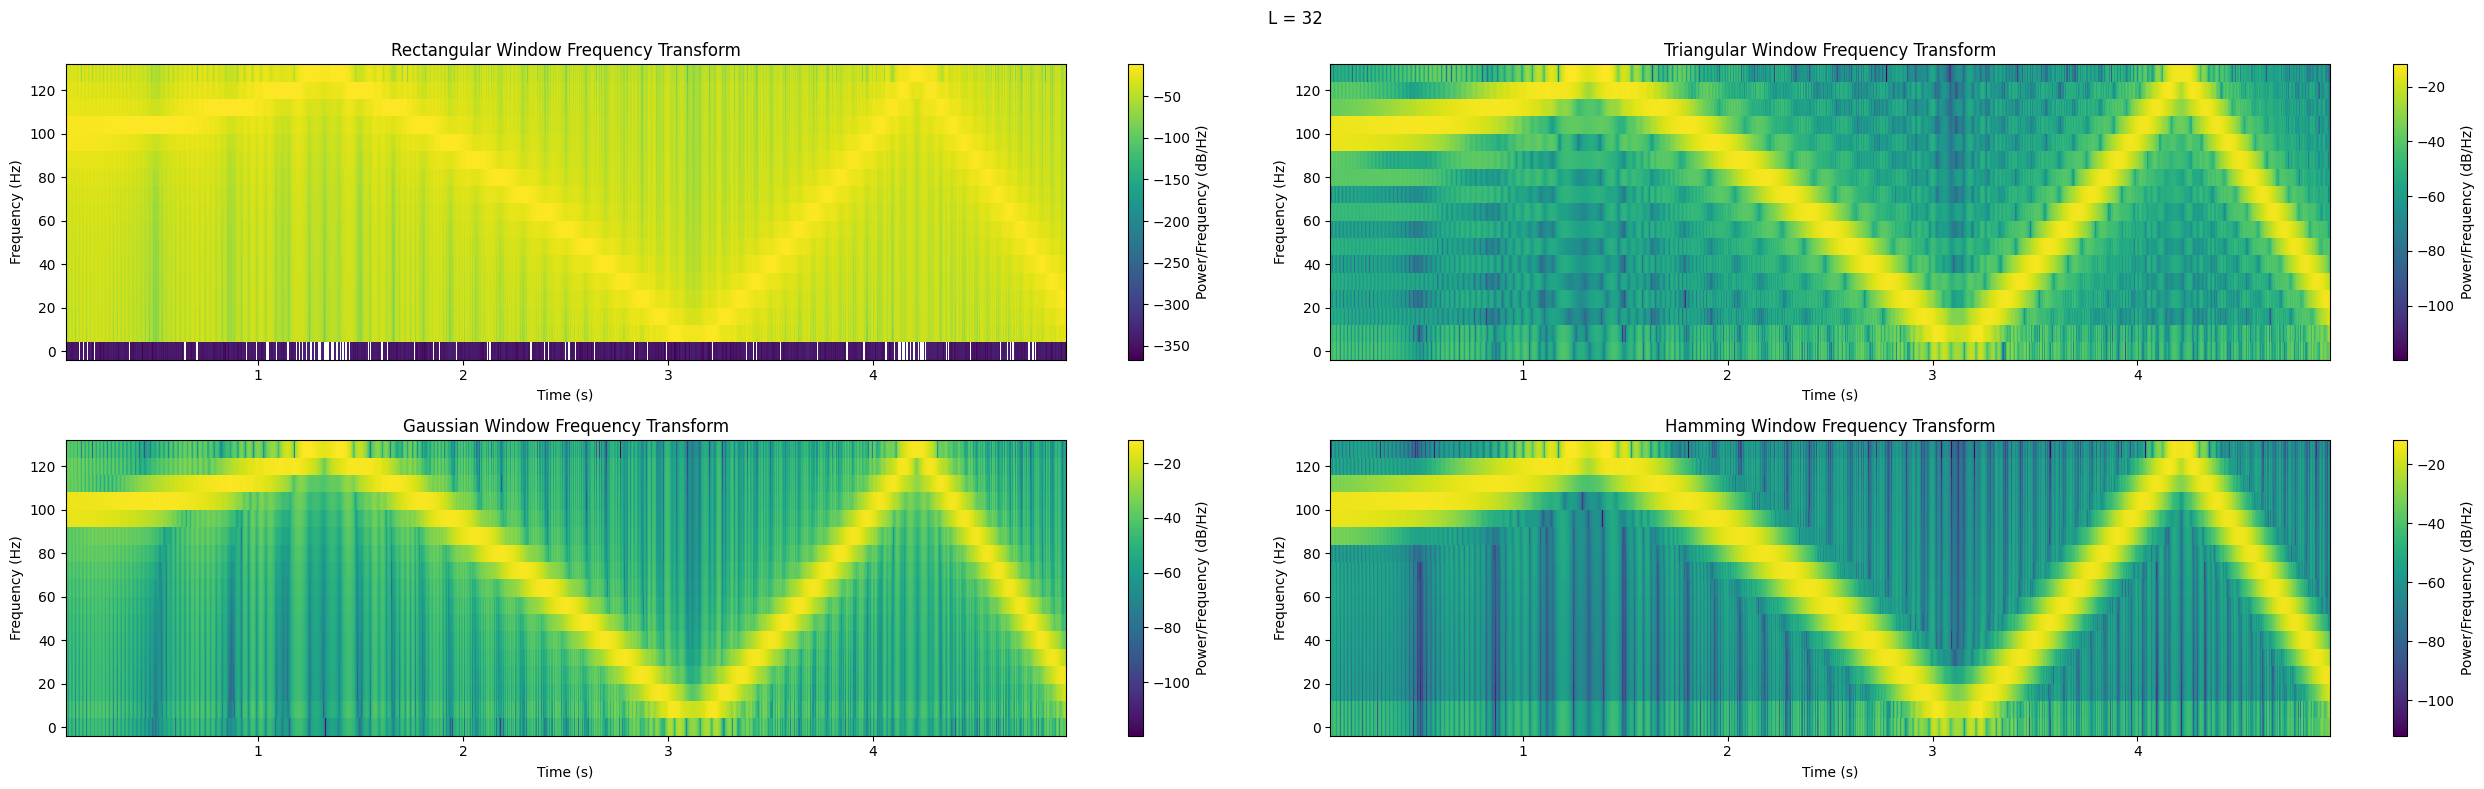

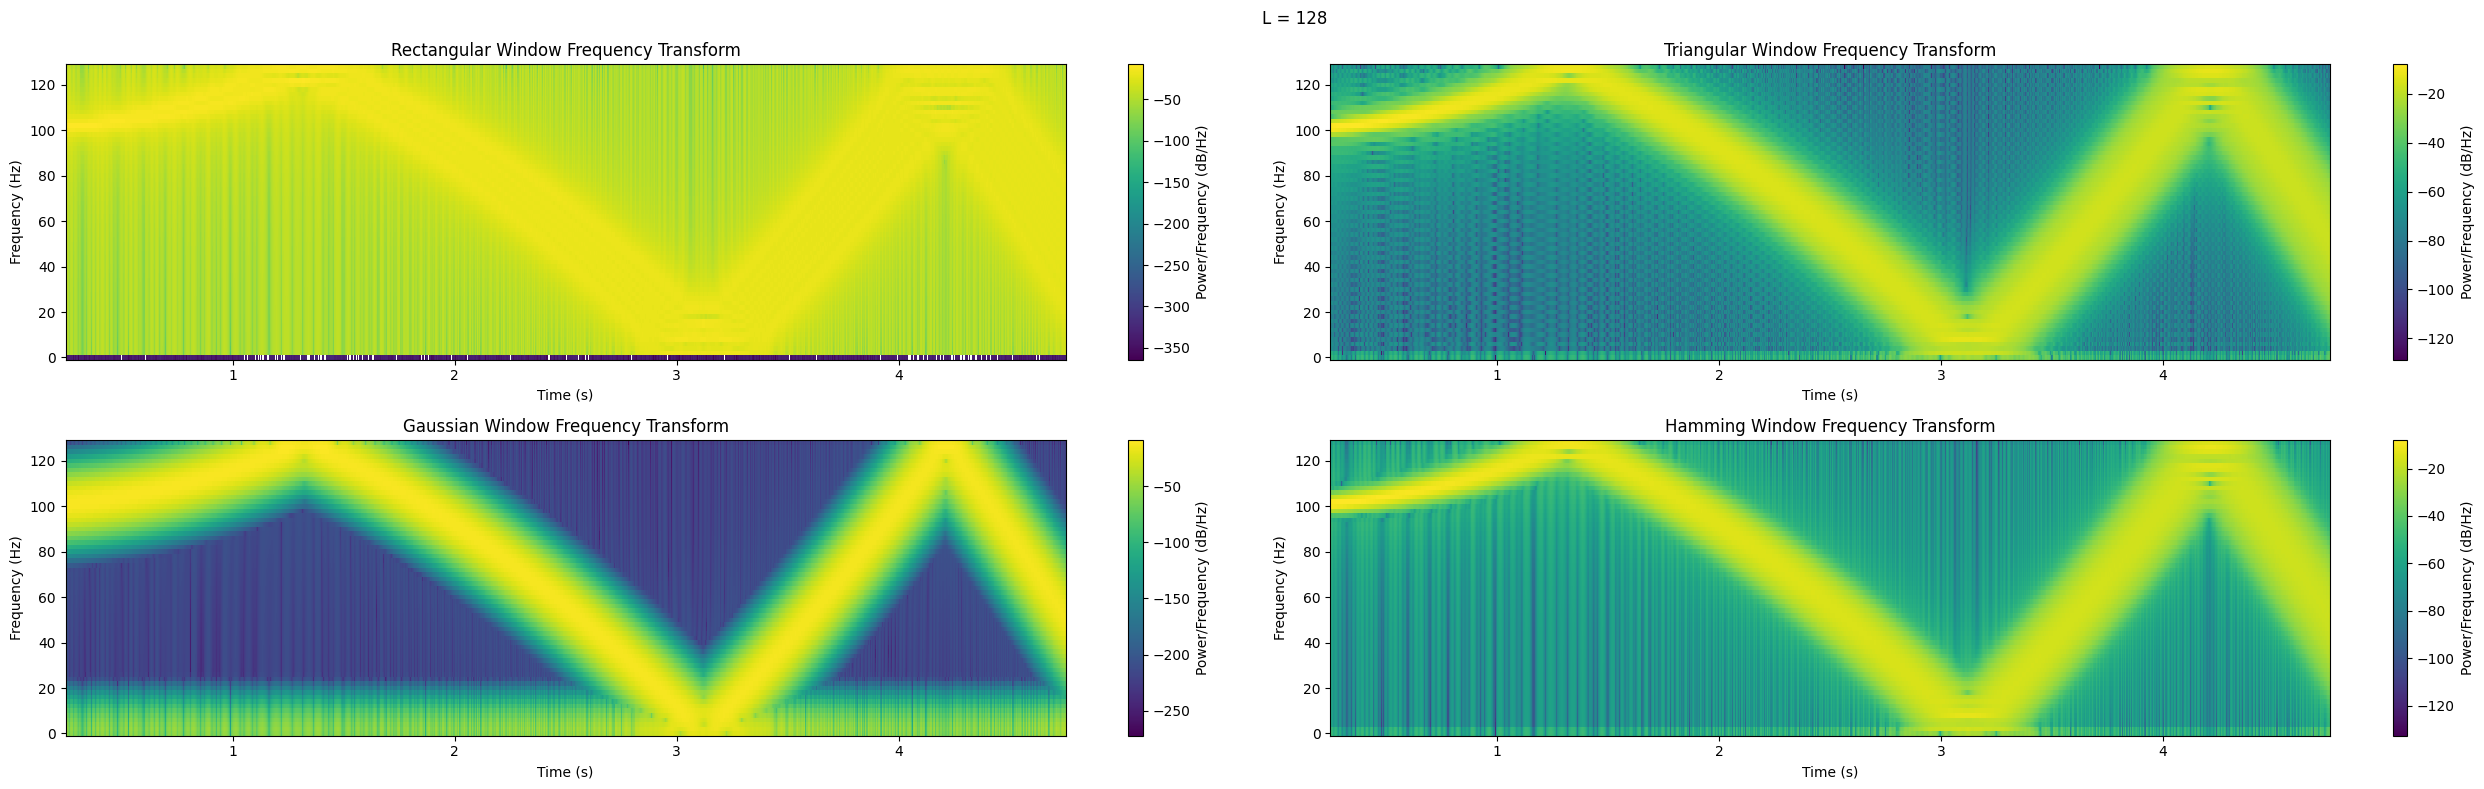

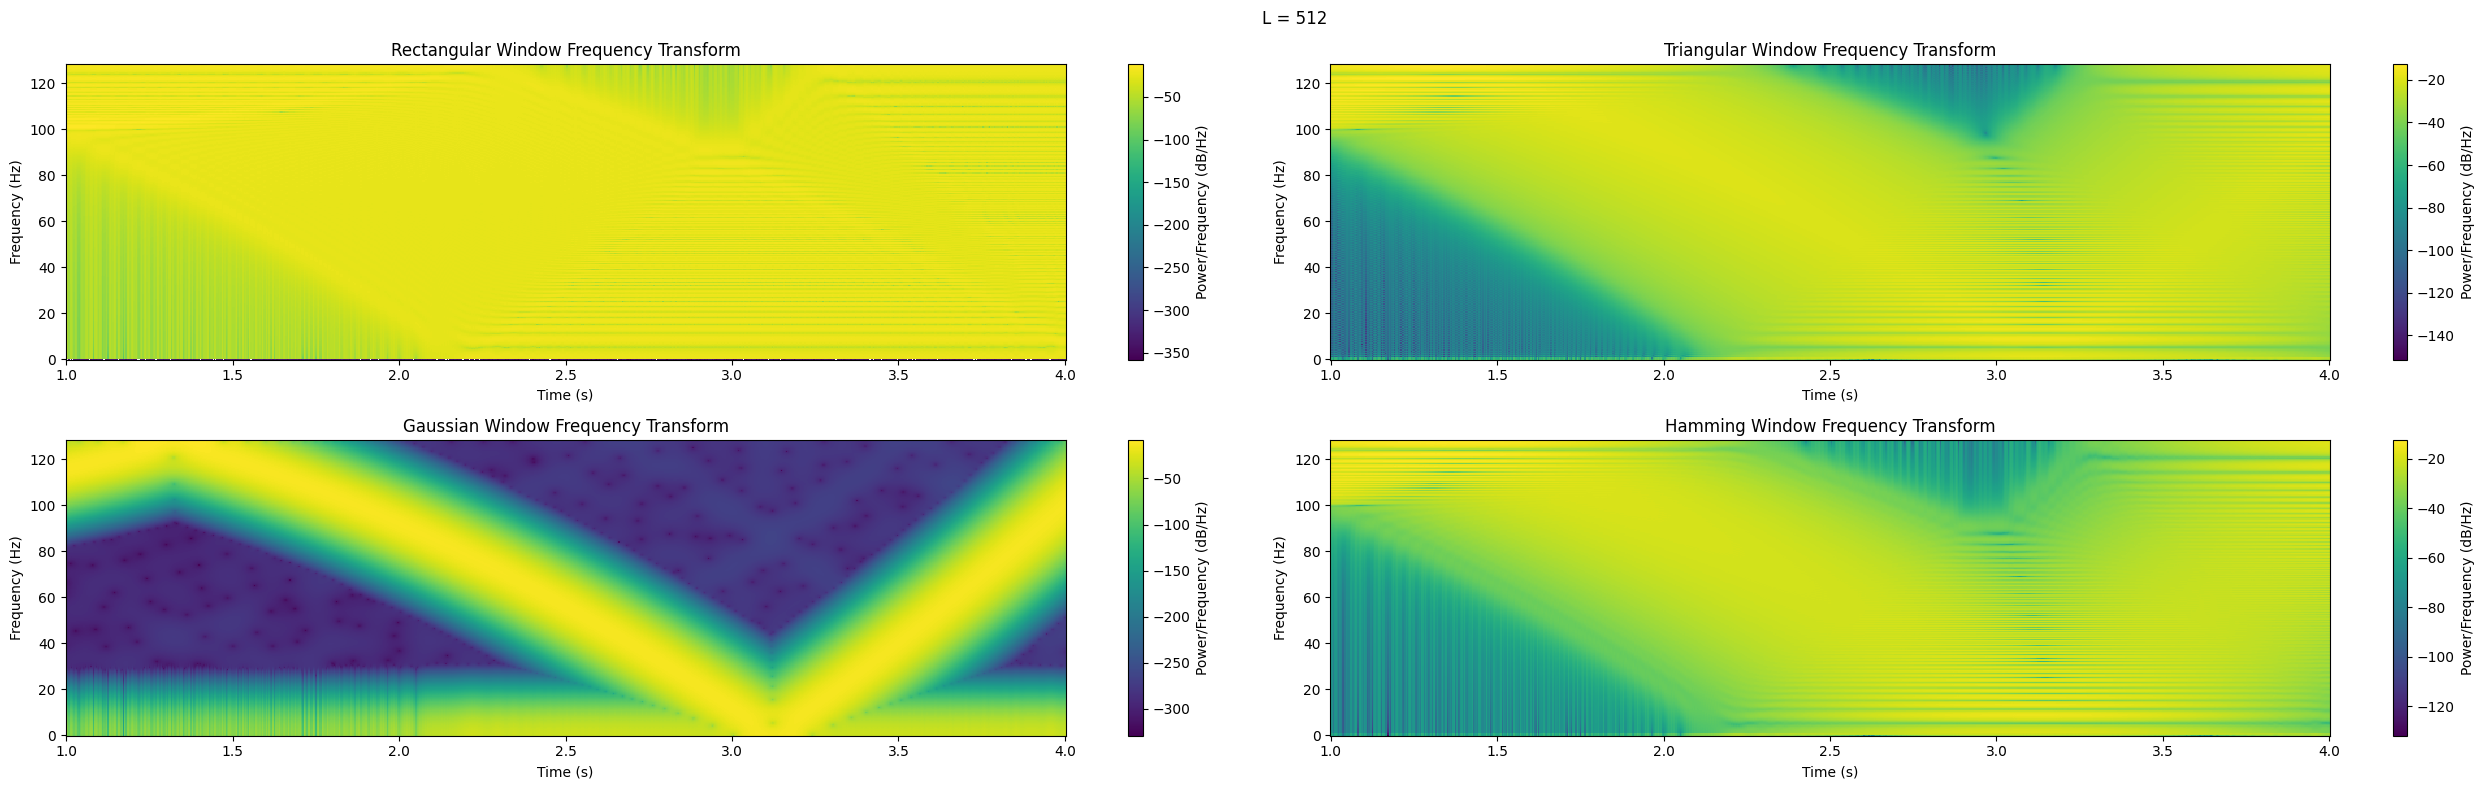

In [16]:
#%% part e
Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()


<ipython-input-17-c8444463b6ba>:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


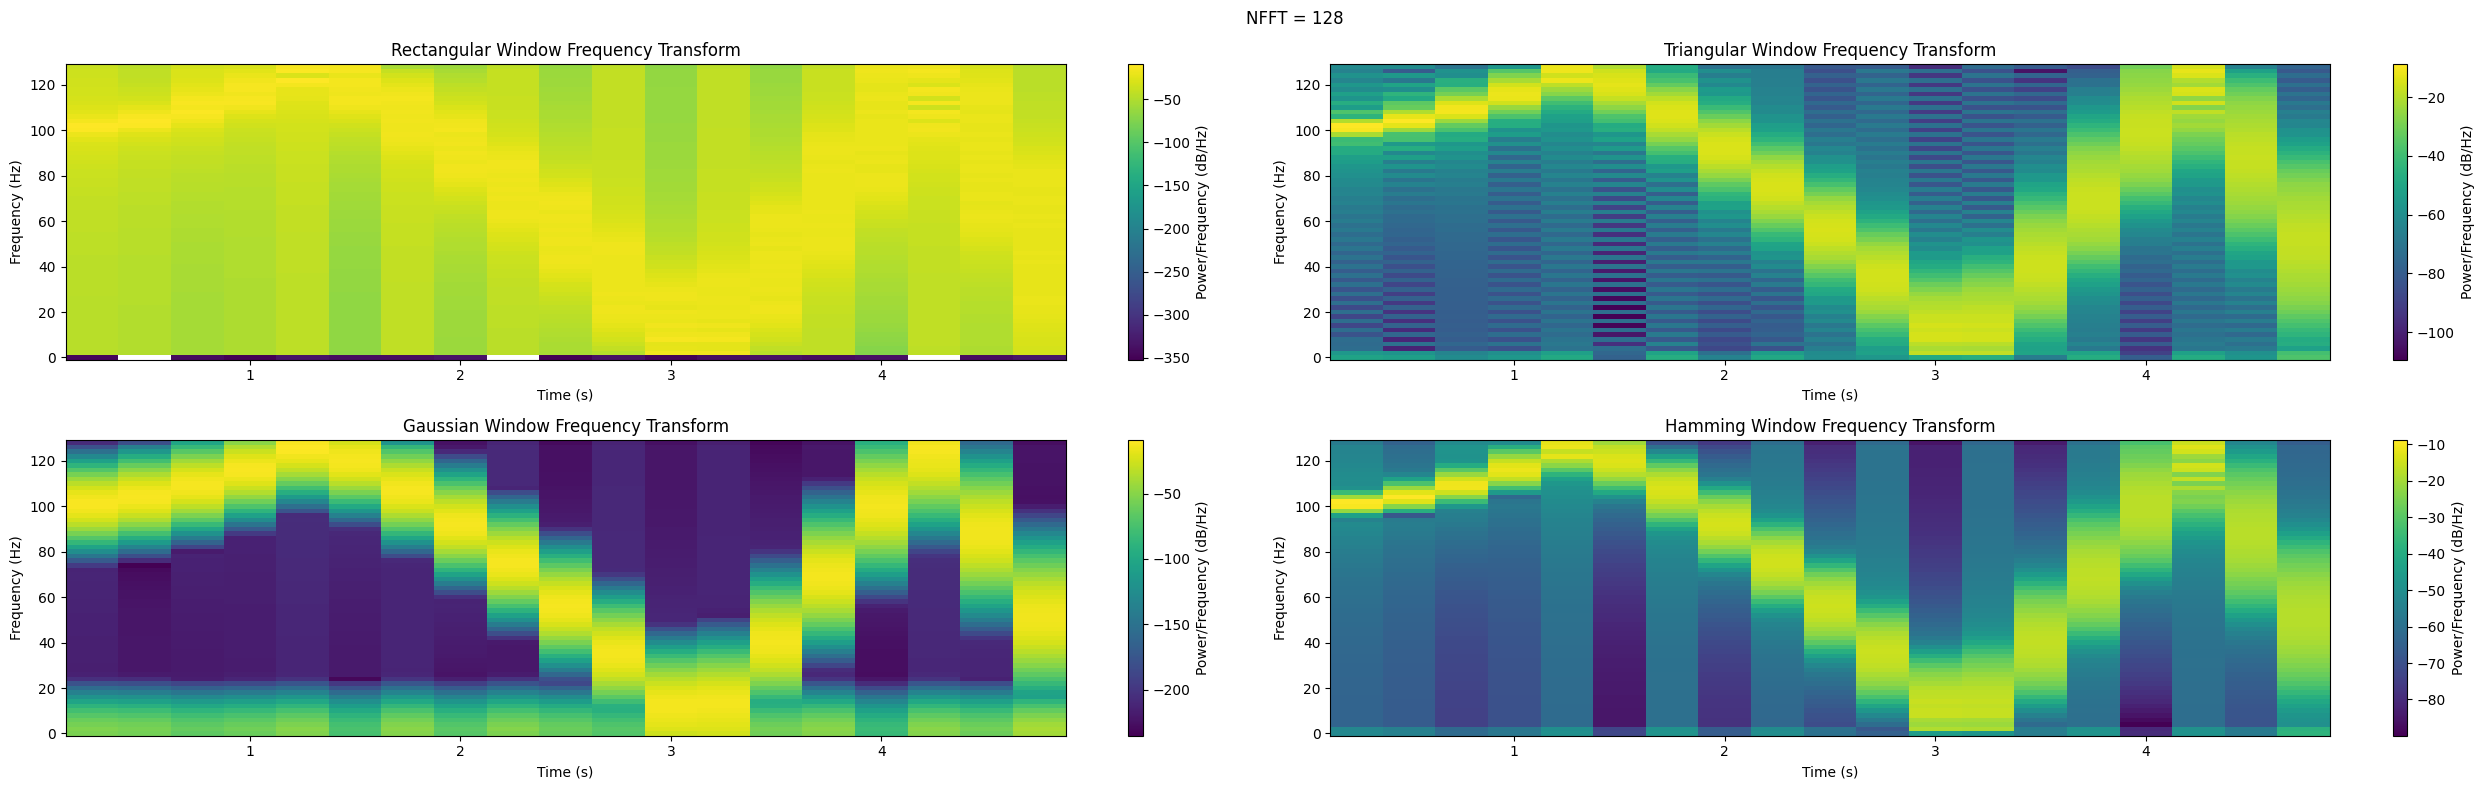

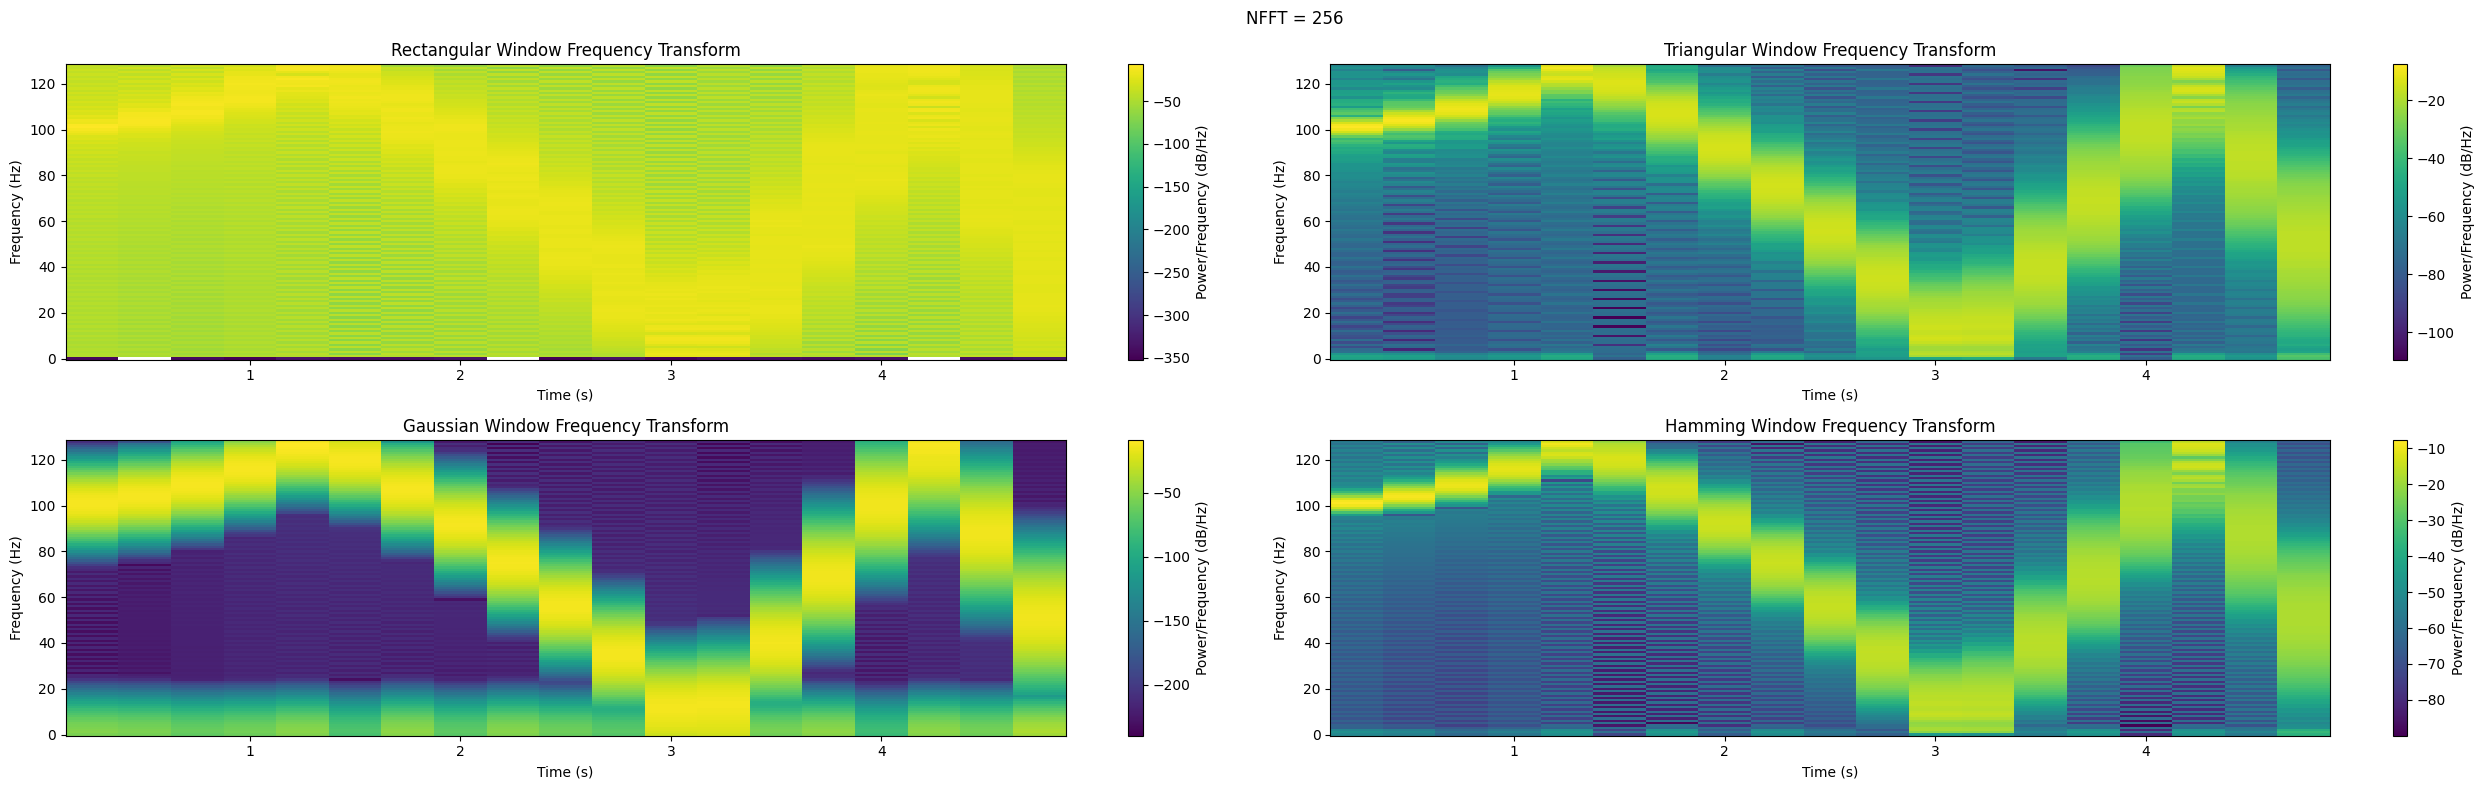

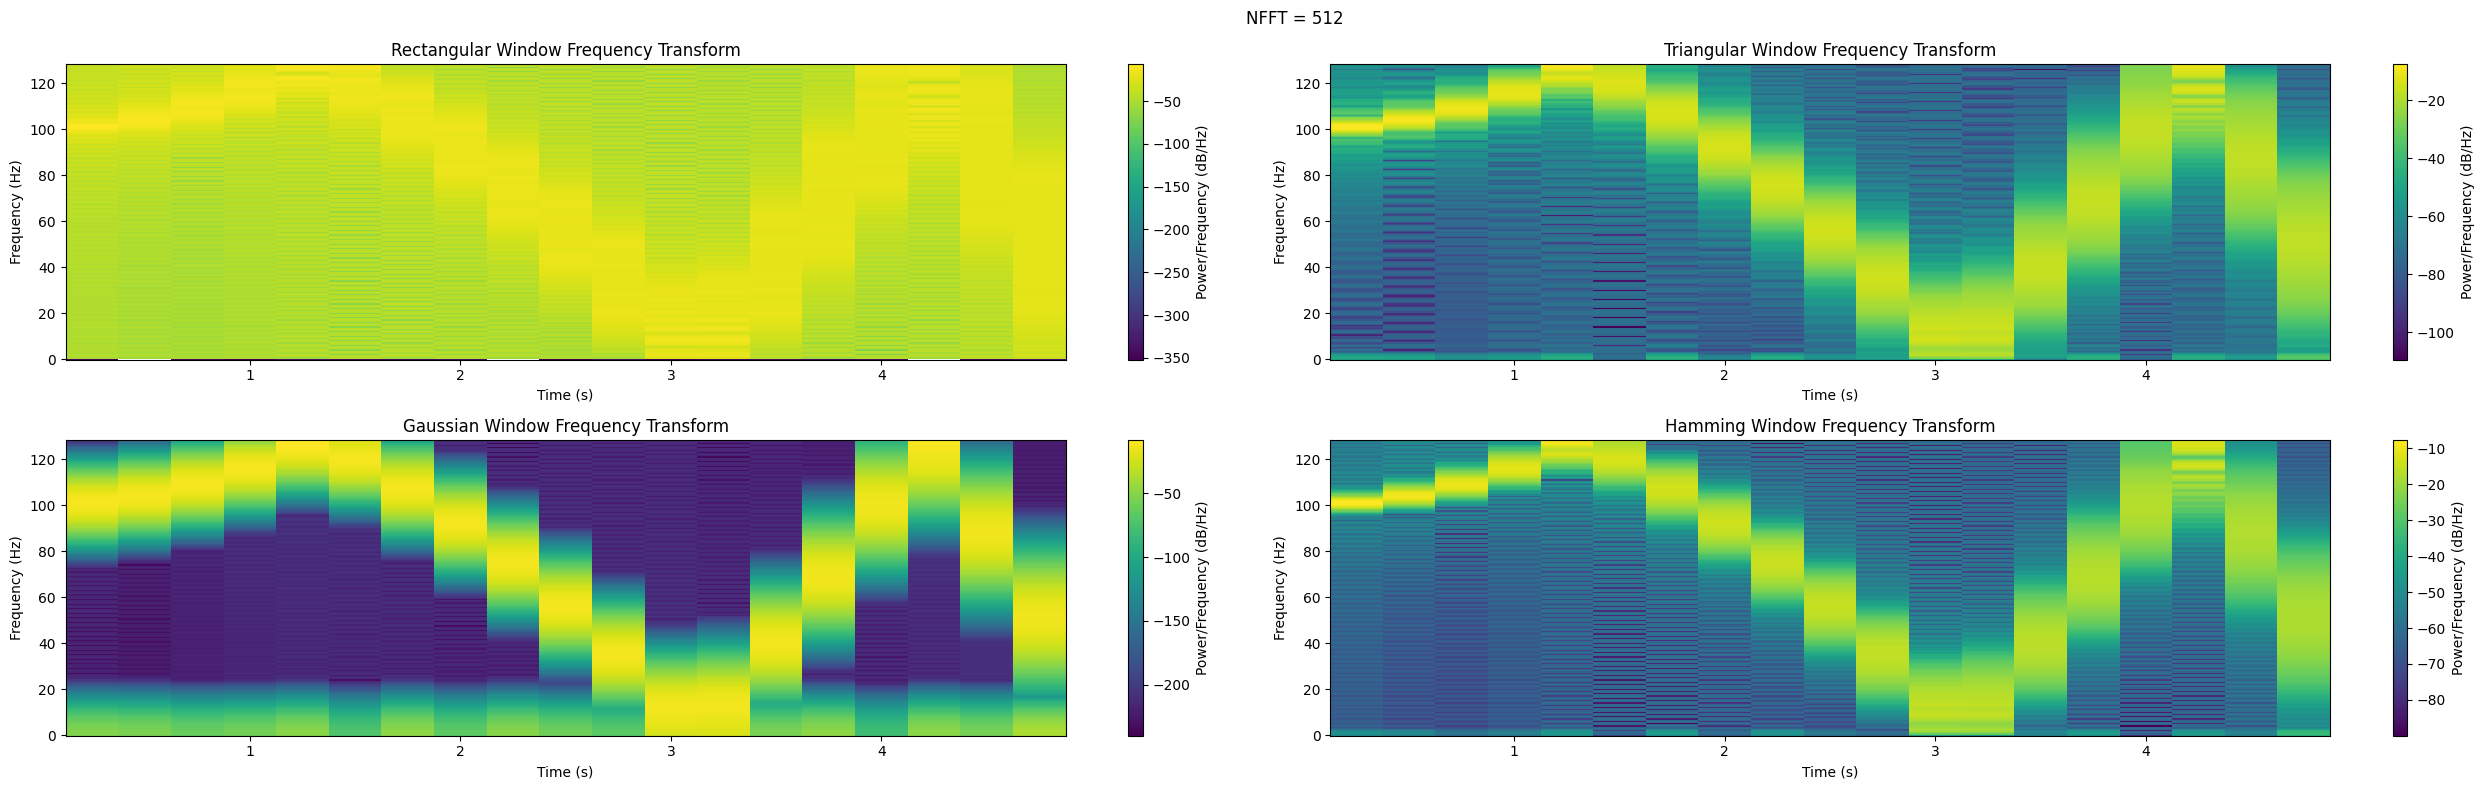

In [17]:
#%% part f
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()

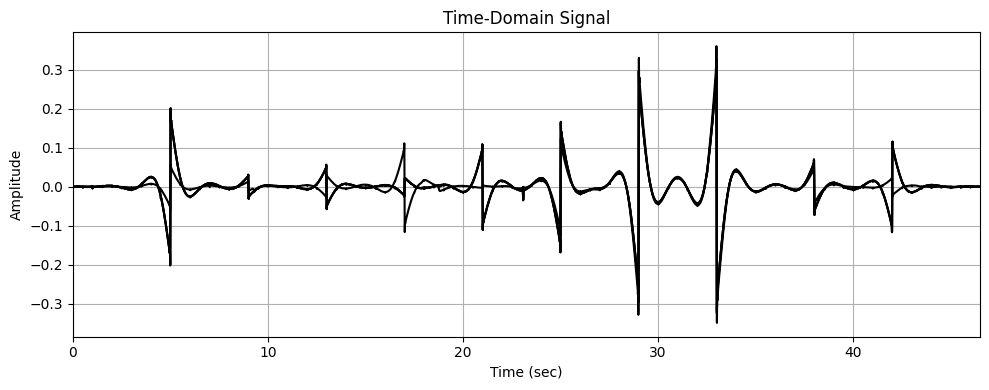

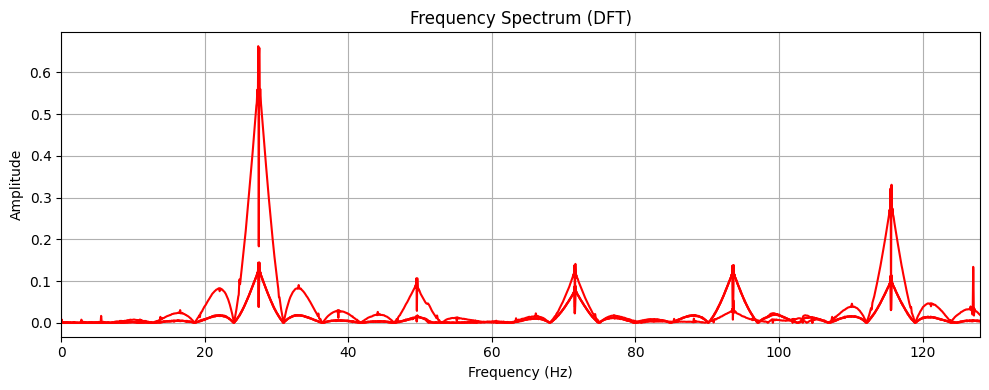

In [12]:
#%% Question 2
# part a
data=signal
signal=filtered_data
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import stft

# Create a new DataFrame for 'Output1'


# Extract the signal from the new DataFrame
#signal = signal.to_numpy()

# Define the sampling frequency and create the time vector
fs = 256  # Hz
t = np.arange(len(signal)) / fs

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

# Plot the frequency spectrum (DFT)
dft = fft(signal)
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()



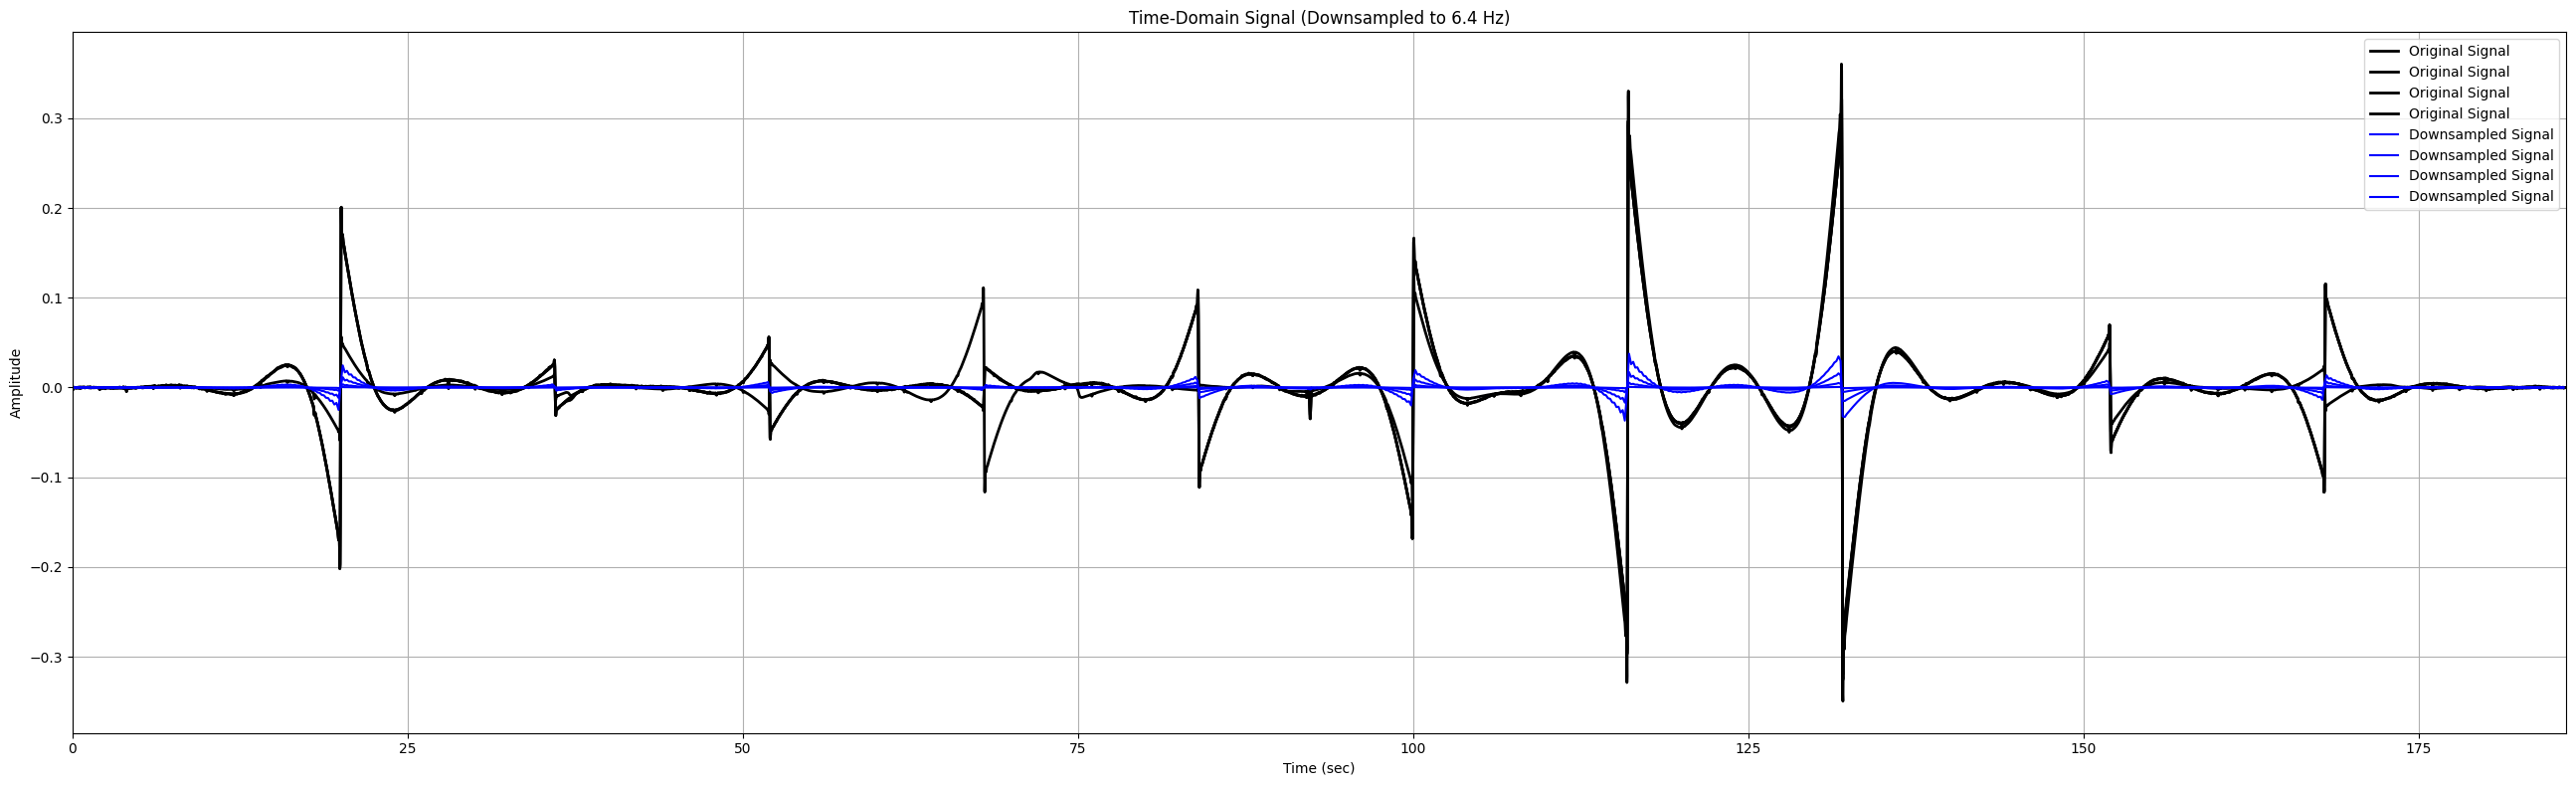

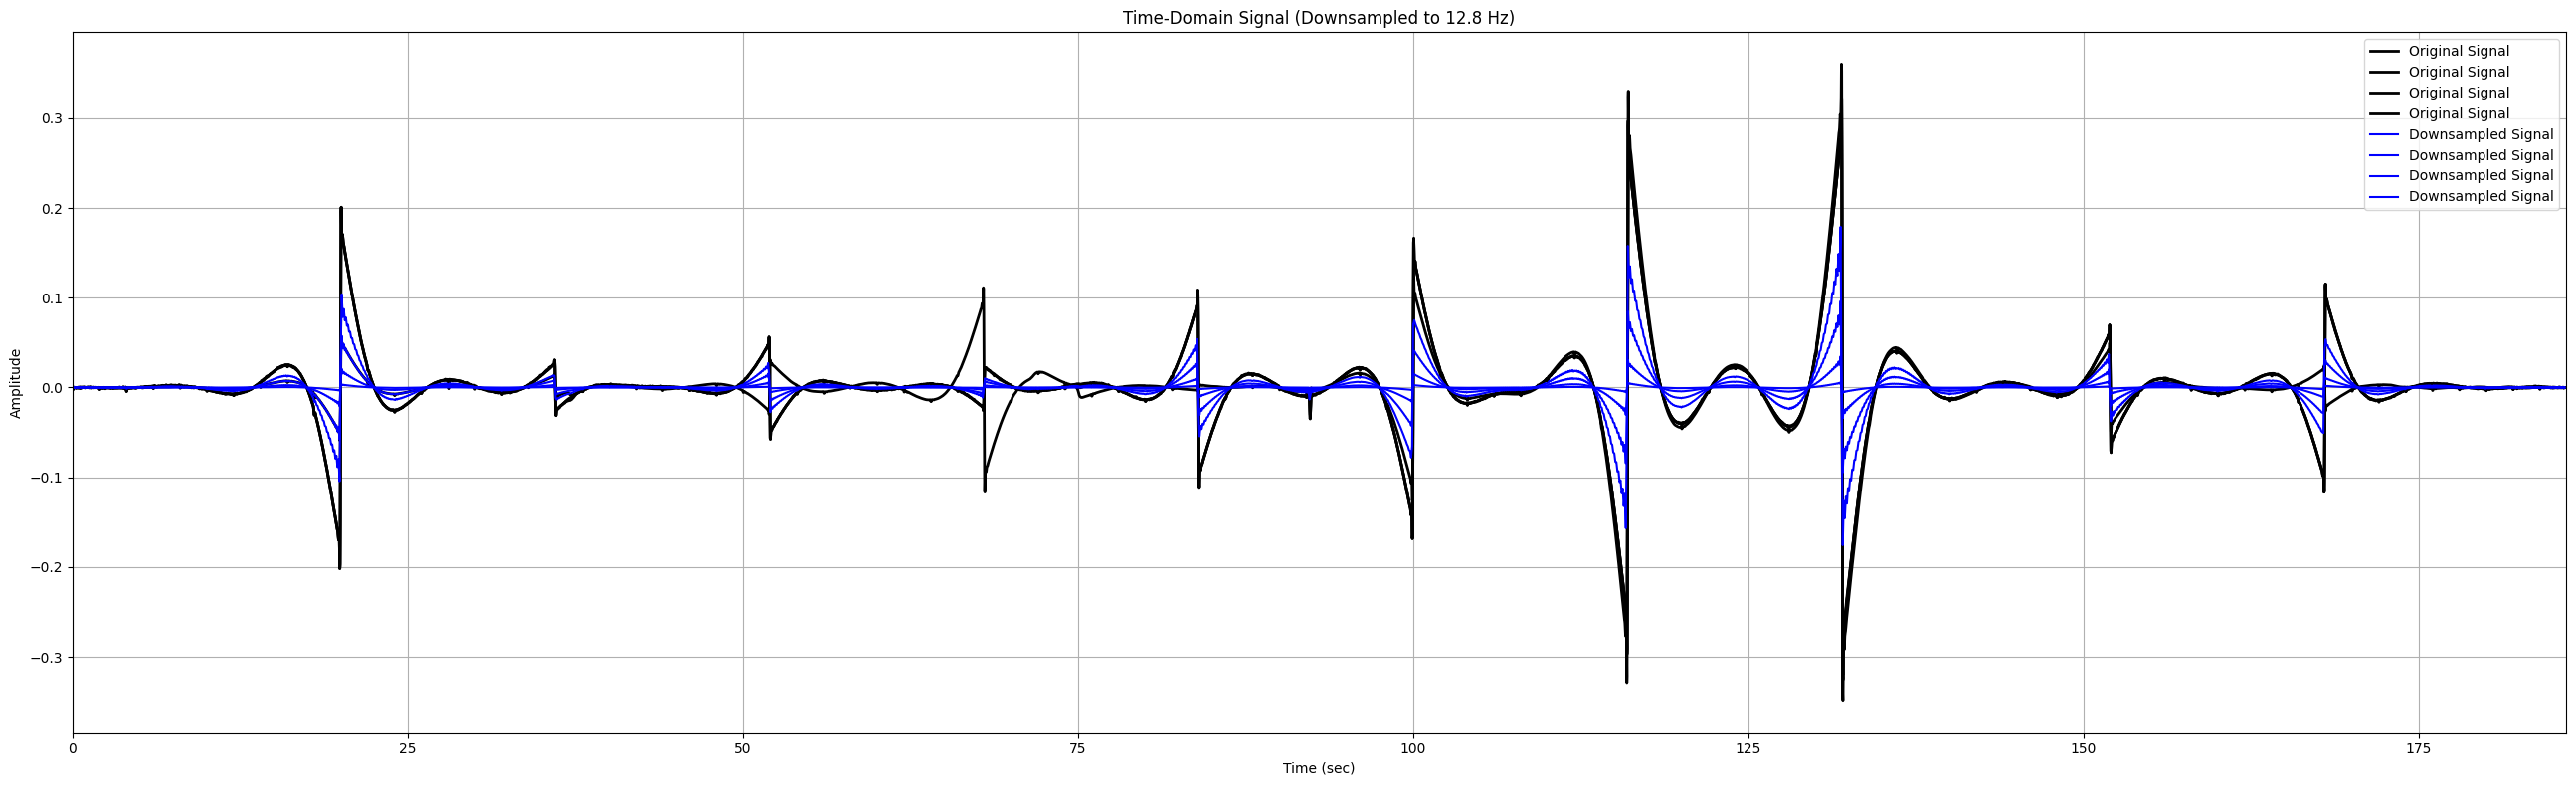

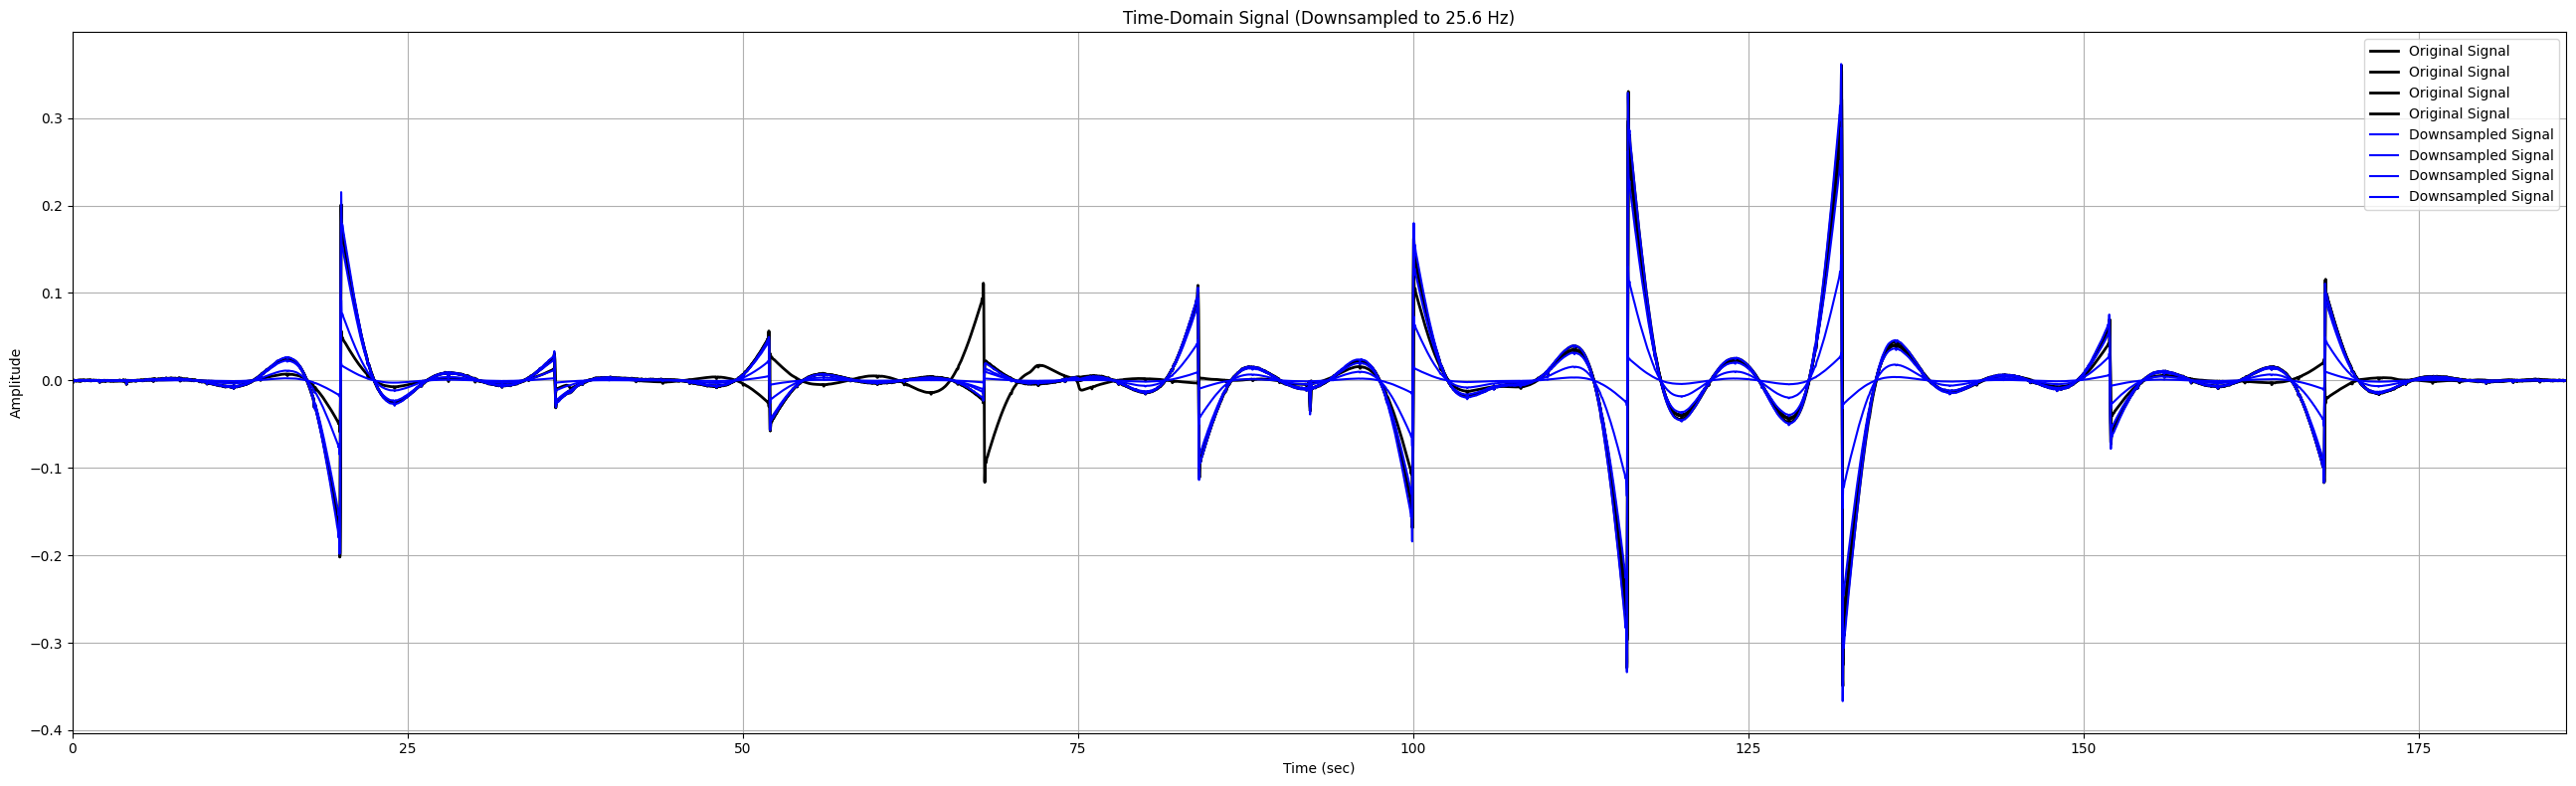

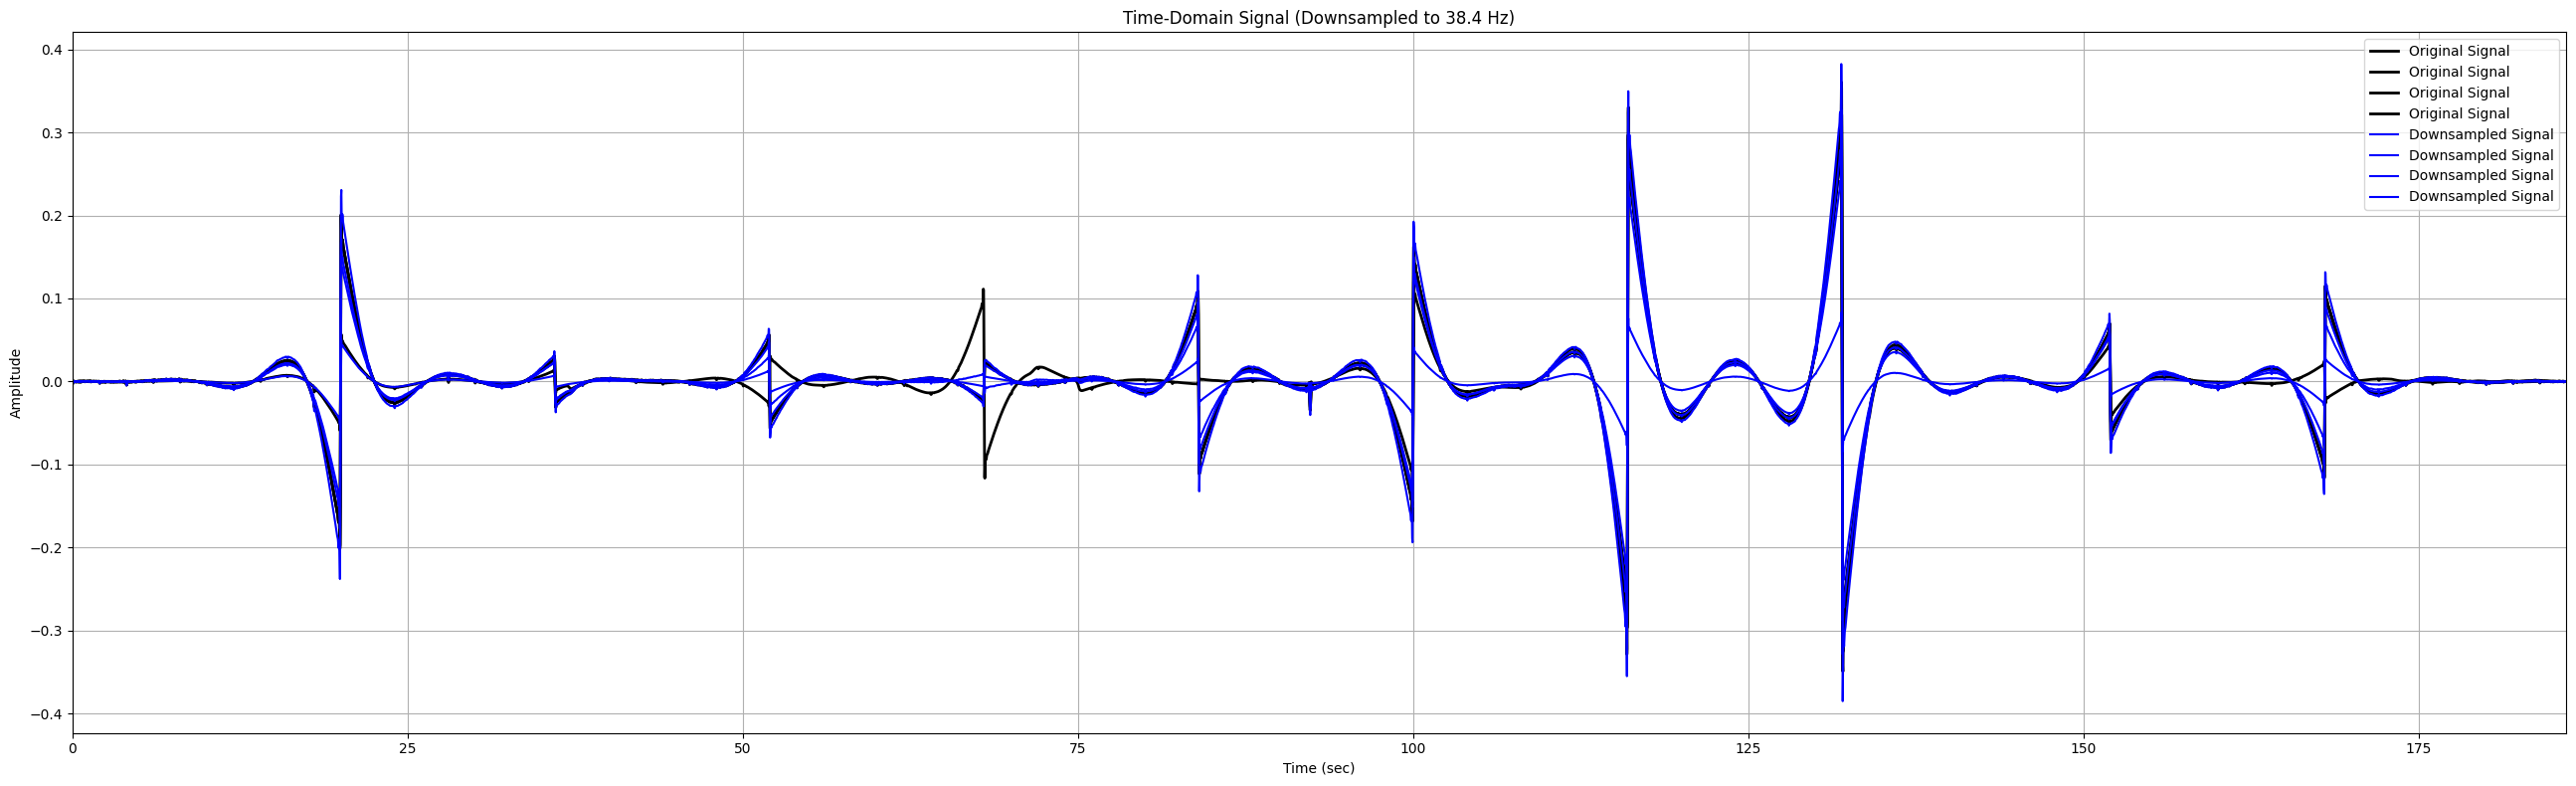

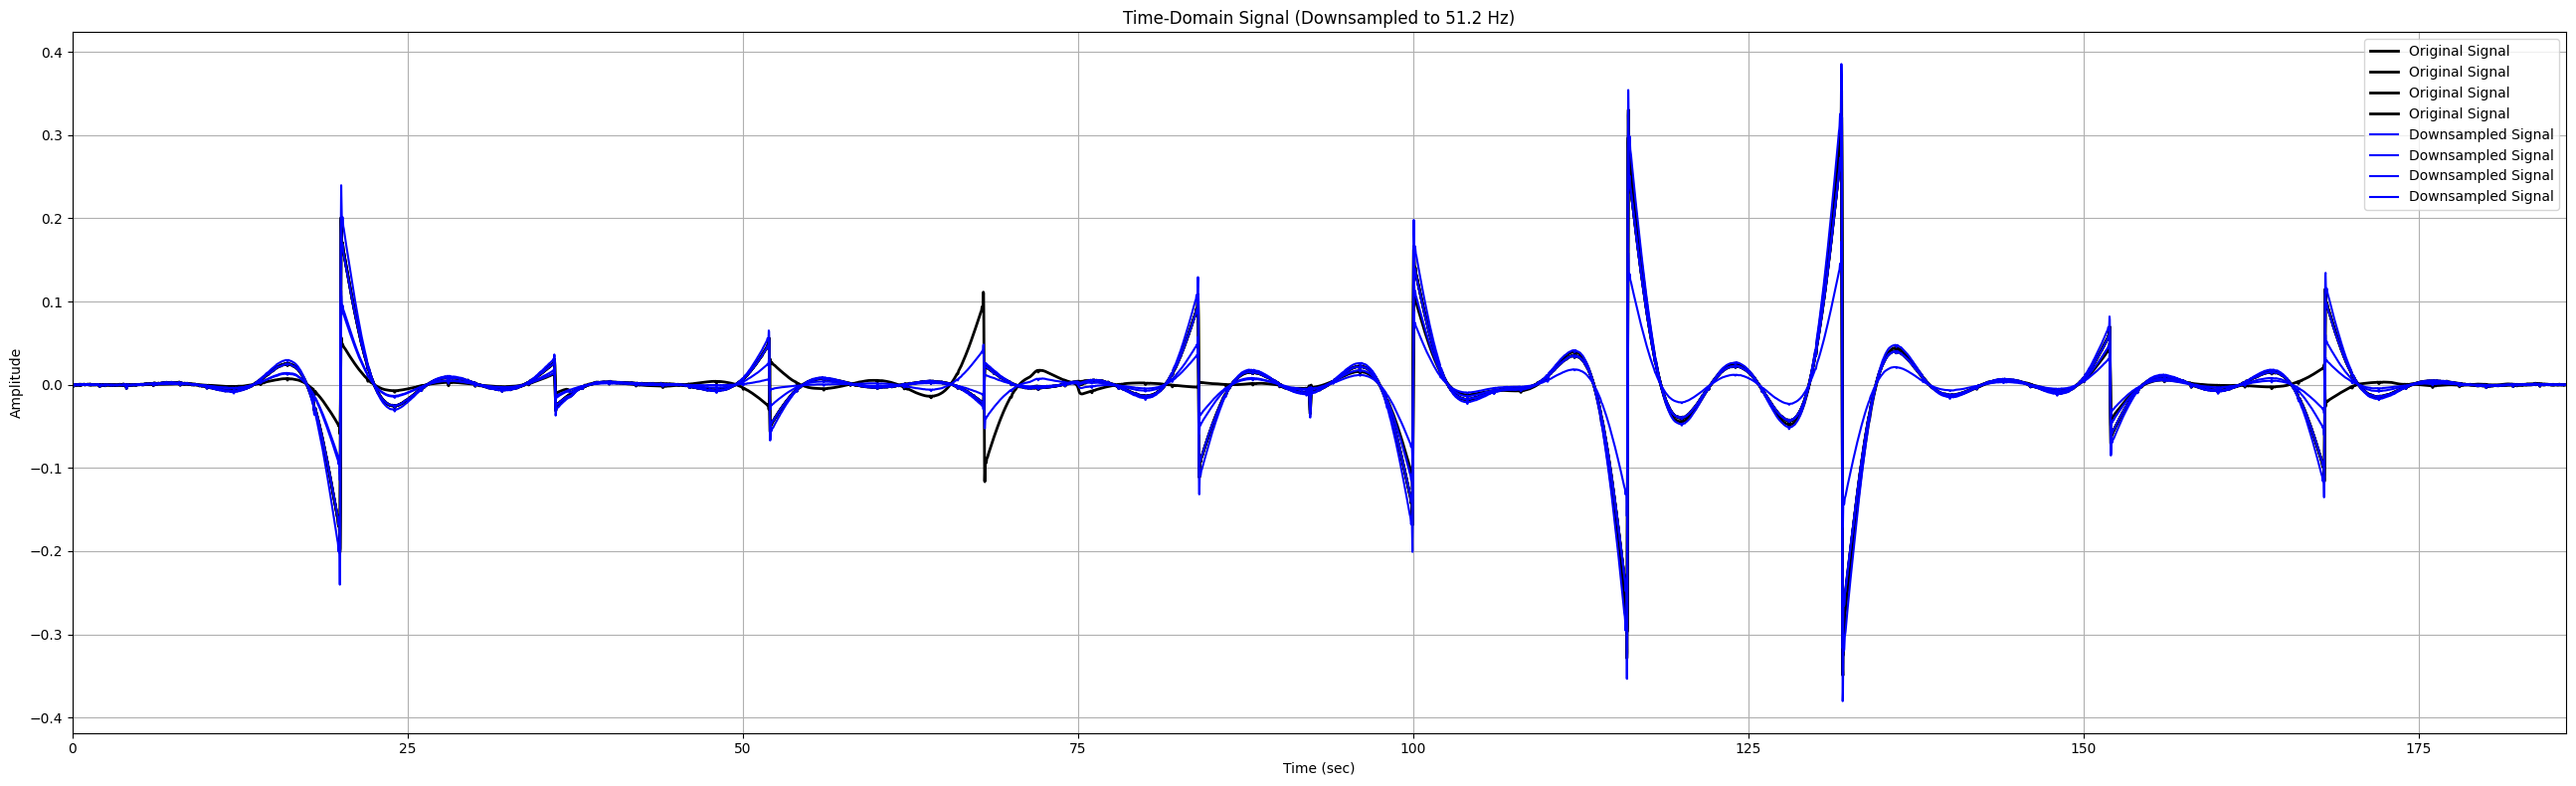

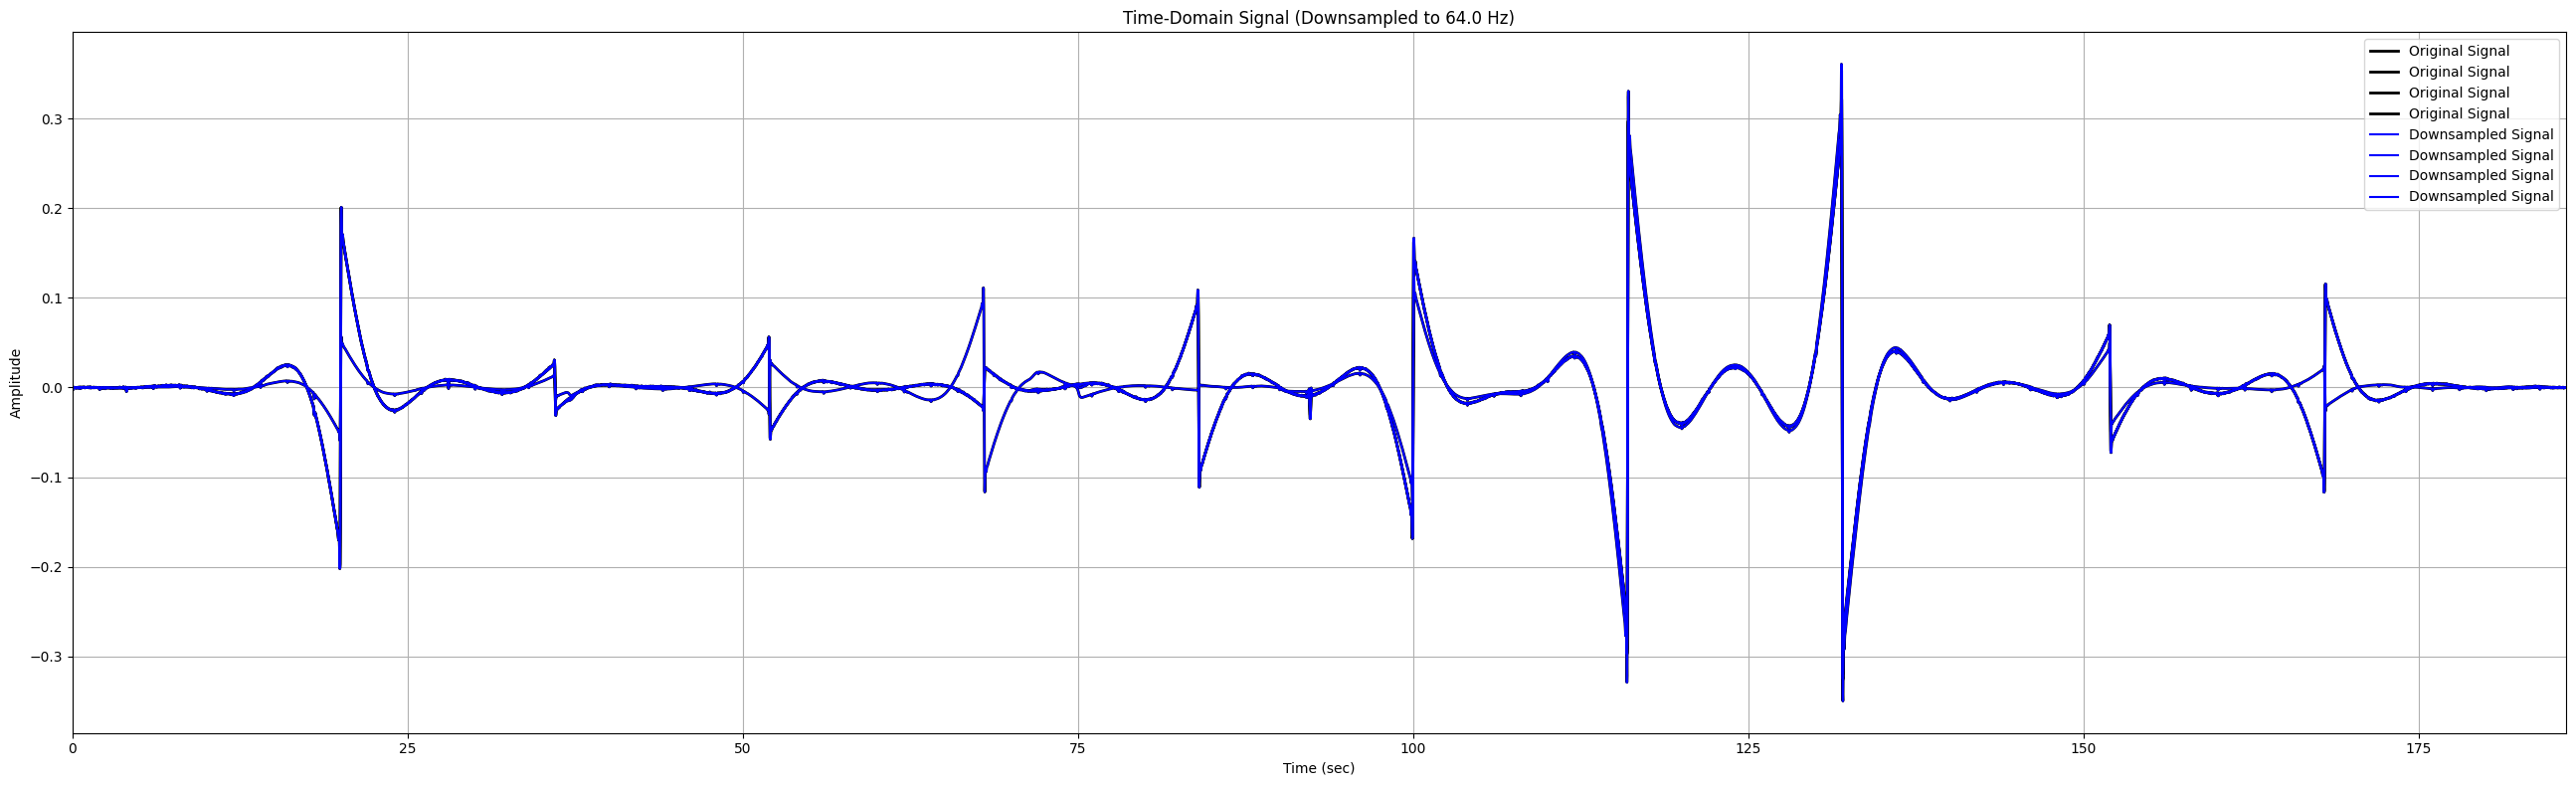

In [38]:
from scipy.signal import butter, lfilter, resample
import matplotlib.pyplot as plt
import numpy as np

# Example parameters
fs = 64 # original sampling rate in Hz
signal = filtered_data# example signal, 10 seconds of random noise
M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M) * fs / 10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0, len(signal)) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)))

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, 'b', label="Downsampled Signal")
    plt.title(f"Time-Domain Signal (Downsampled to {desired_fs} Hz)")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()


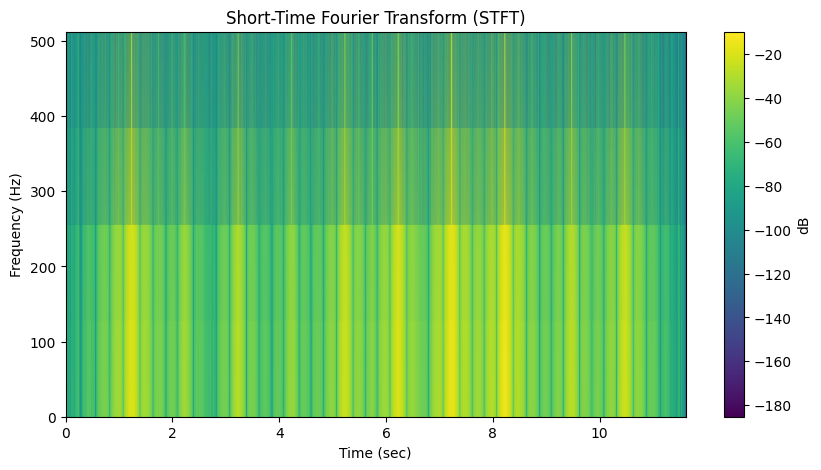

In [19]:
import numpy as np
import pandas as pd
from scipy.signal import stft
import matplotlib.pyplot as plt

# Load the EEG data from the uploaded Excel file

eeg_data = filtered_data

# Ensure data is in the correct format (numpy array)
#eeg_data = eeg_data.to_numpy()

# STFT parameters
fs = 1025  # Sampling frequency of the EEG data
nperseg = 4 # Length of each segment for STFT

# Apply STFT to each channel
frequencies = []
times = []
stft_result = []

for channel in eeg_data.T:  # Transpose to iterate over columns (channels)
    f, t, Zxx = stft(channel, fs=fs, nperseg=nperseg)
    frequencies.append(f)
    times.append(t)
    stft_result.append(Zxx)

# Plot the STFT of the first channel as an example
channel_index = 0  # Change this to plot different channels
plt.figure(figsize=(10, 5))
plt.pcolormesh(times[channel_index], frequencies[channel_index], 20 * np.log10(np.abs(stft_result[channel_index])), shading='gouraud')
plt.title('Short-Time Fourier Transform (STFT)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.colorbar(label='dB')
plt.show()


In [46]:
filtered_data.shape
signal=filtered_data[:,1]
print(signal)
signal.shape
fs=1025

[-3.16709028e-04 -1.47793018e-03 -2.10322493e-03 ... -1.29932396e-04
 -8.07288209e-05 -7.28937054e-05]


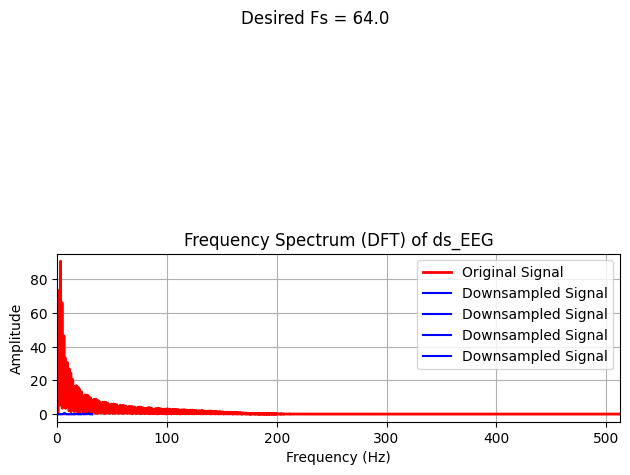

In [47]:
# Frequency Spectrum (DFT) of ds_EEG

plt.subplot(2, 1, 2)
dft = fft(signal)
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
dft_ds_EEG = fft(downsampled_signal)
freq_ds_EEG = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
positive_freq_indices = np.where(freq_ds_EEG >= 0)

plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), c='b', label="Downsampled Signal")
plt.title("Frequency Spectrum (DFT) of ds_EEG")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.suptitle("Desired Fs = {}".format(desired_fs))
plt.tight_layout()
plt.legend()
plt.xlim(0, fs/2)
plt.show()



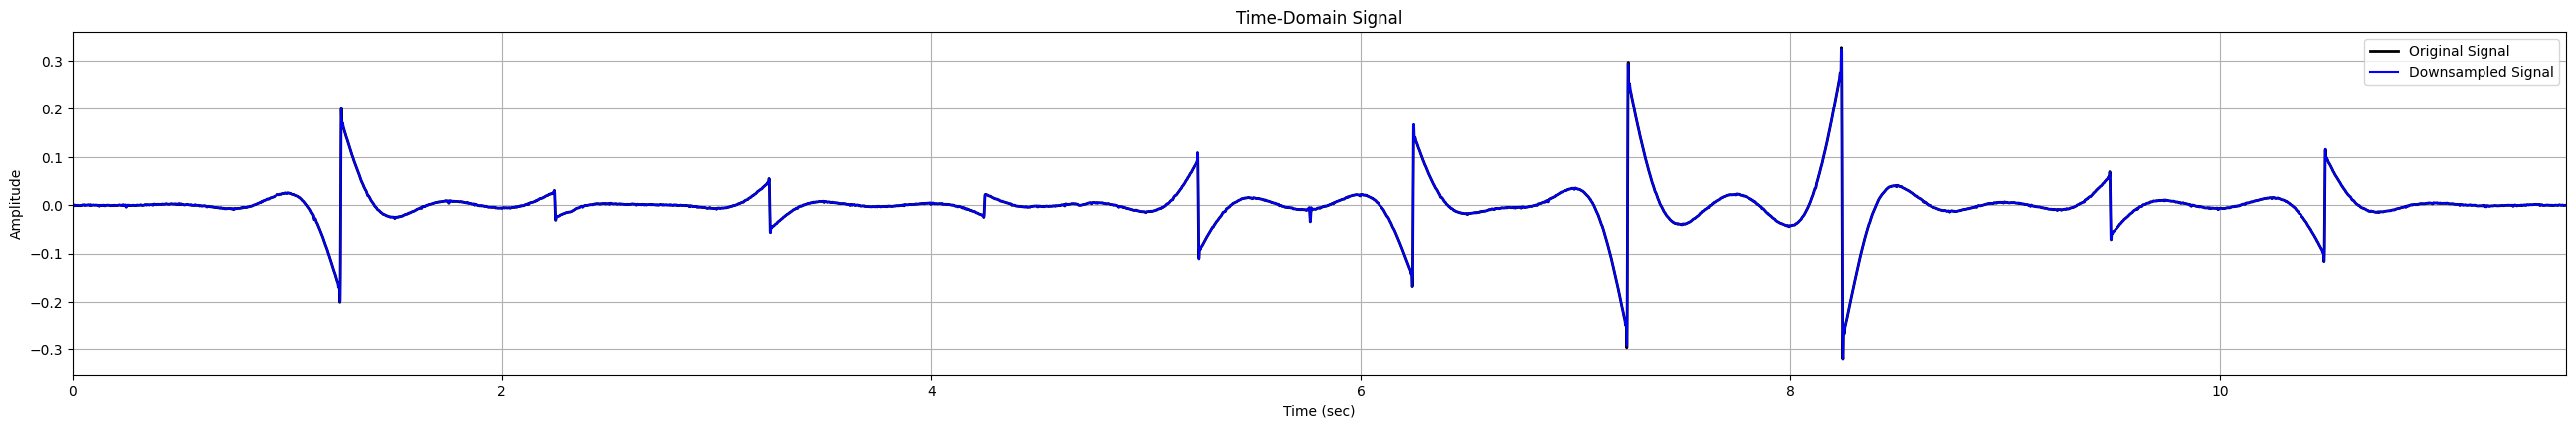

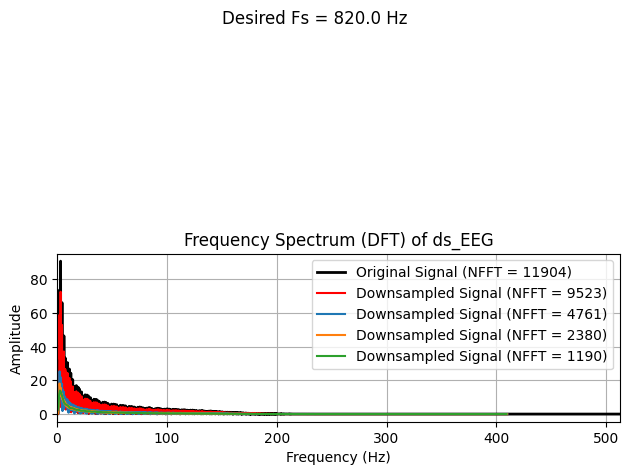

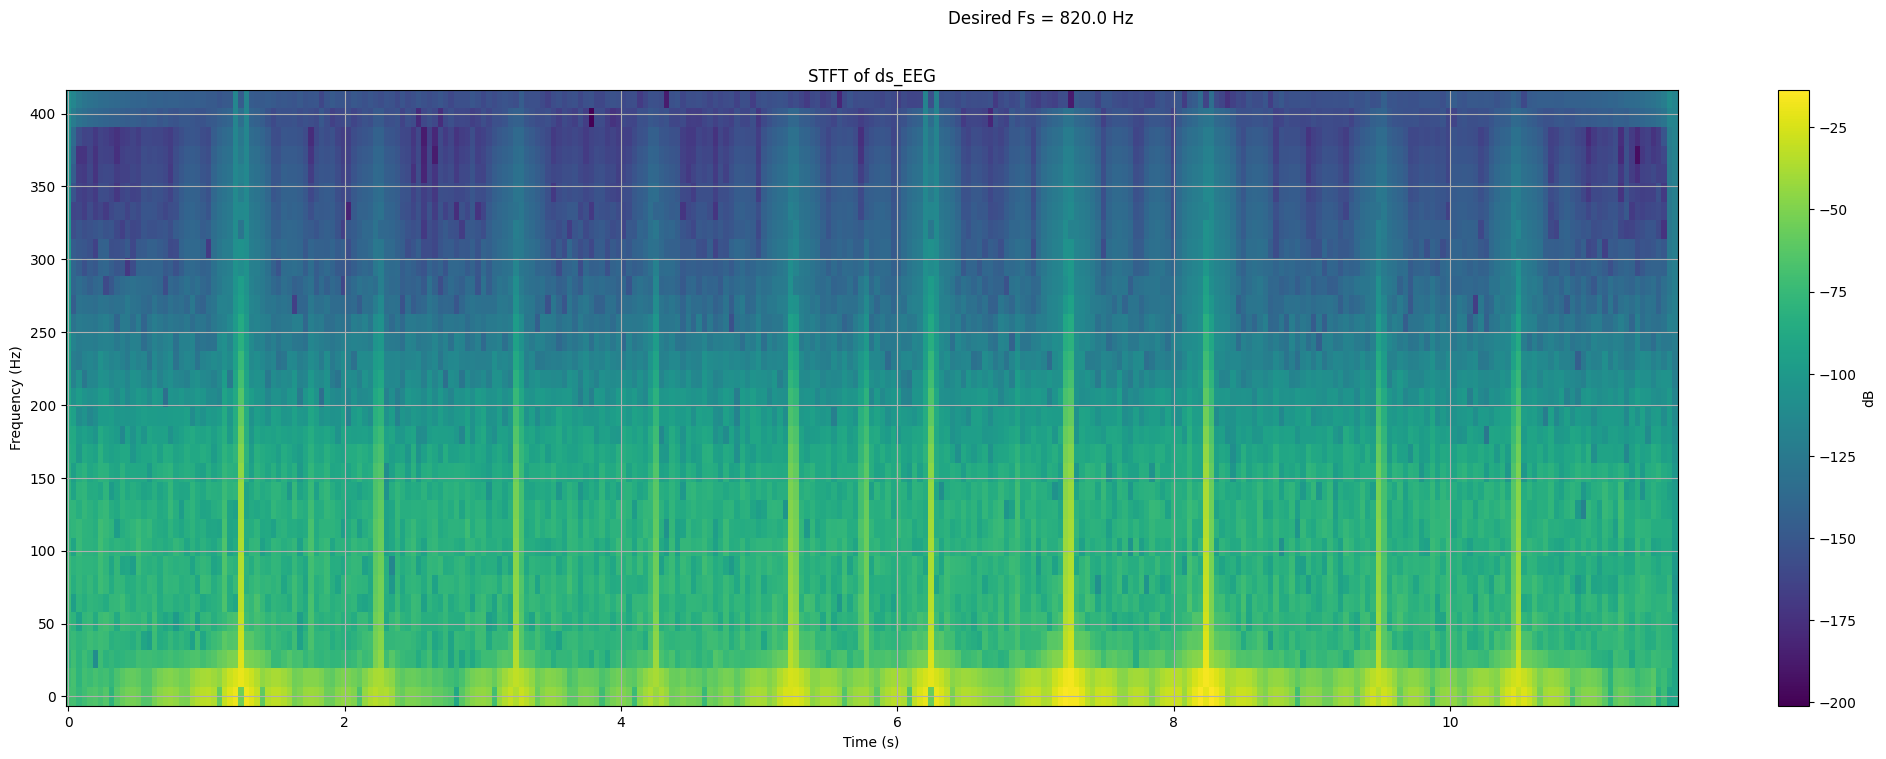

In [54]:
fs=1025
signal=filtered_data[:,1]
M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t = np.arange(0,len(signal)) / fs

    # Step 1: Apply a low-pass filter
    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    # Step 2: Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    # Step 3: Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)

    dft = fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]

    for NFFT in NFFTs:
        dft_ds_EEG = fft(downsampled_signal, NFFT)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()

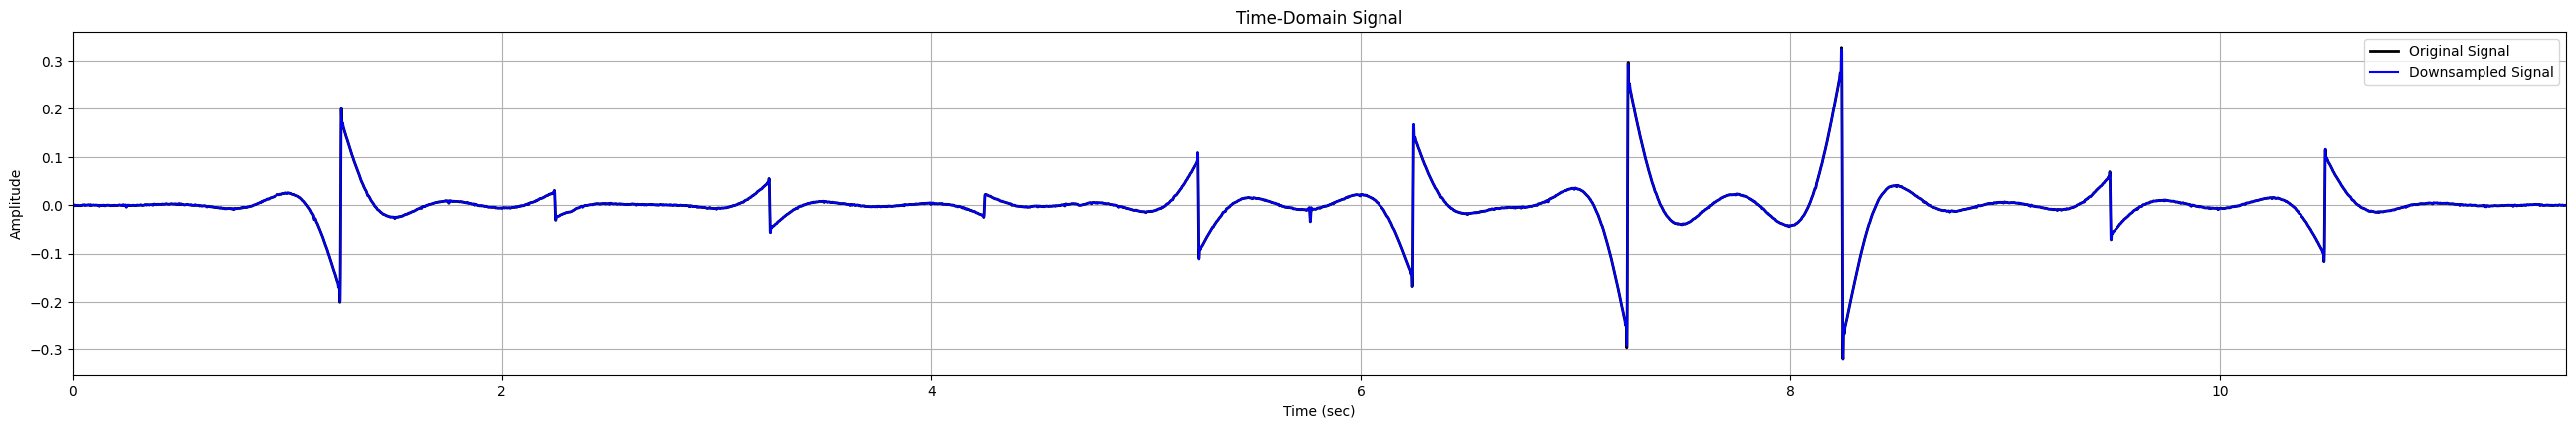

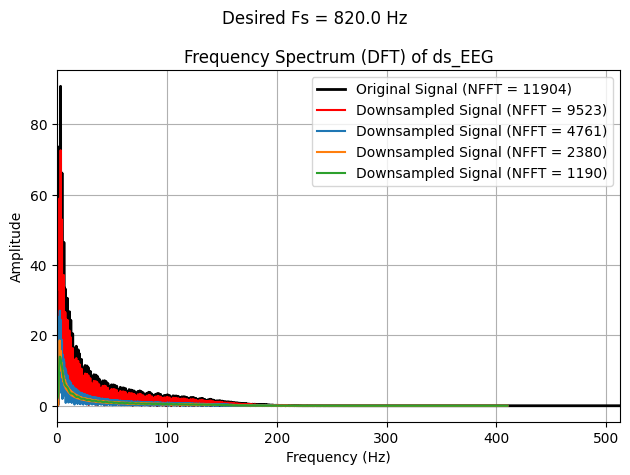

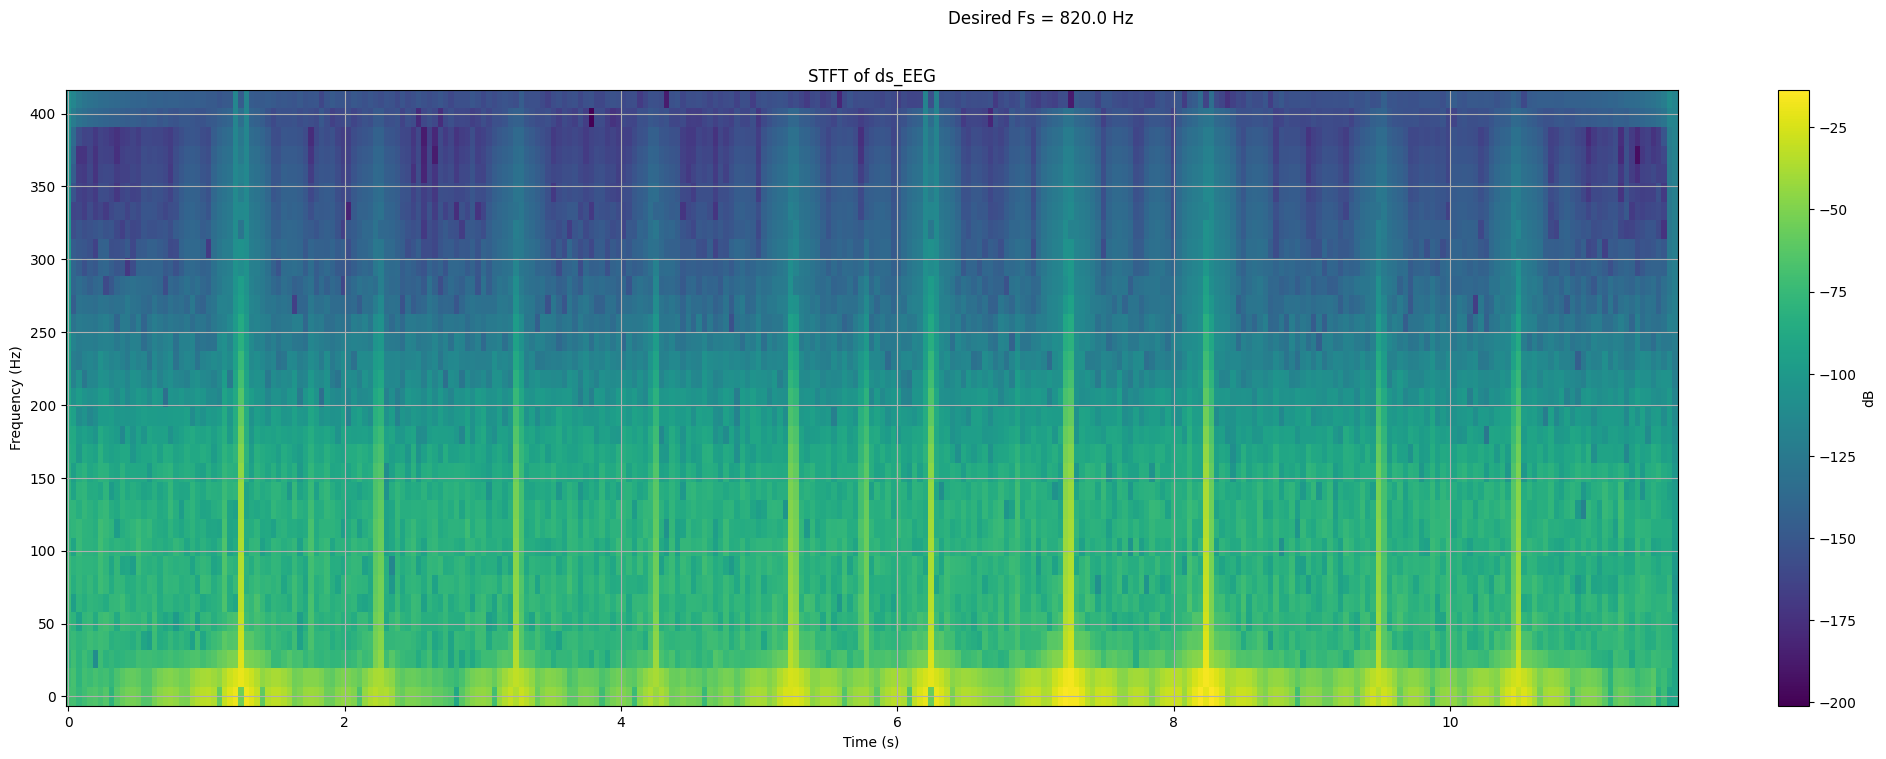

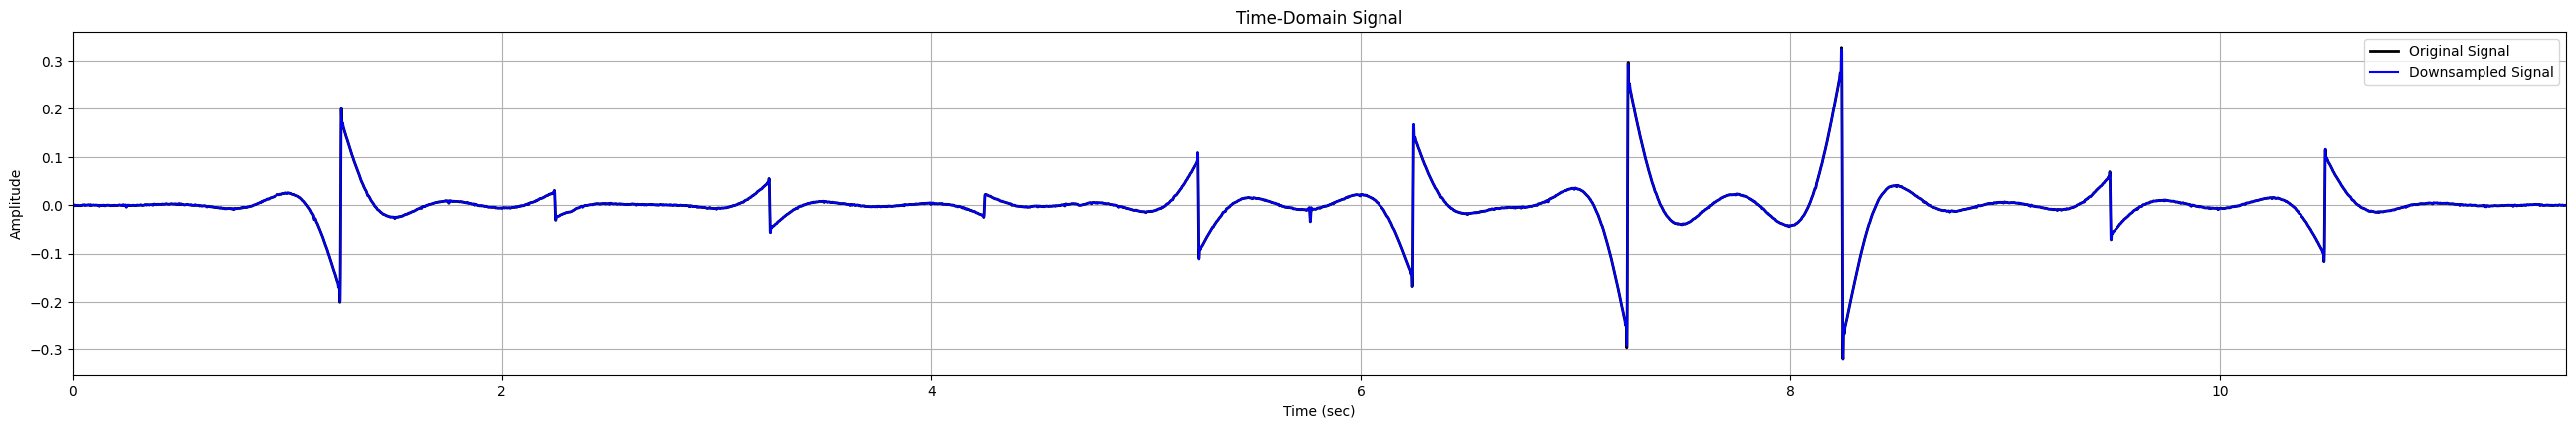

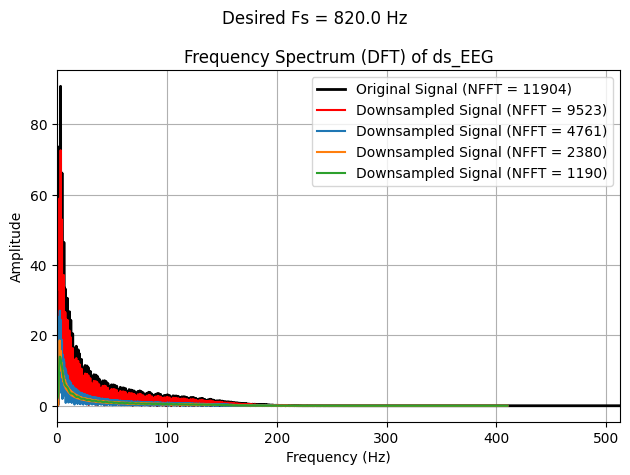

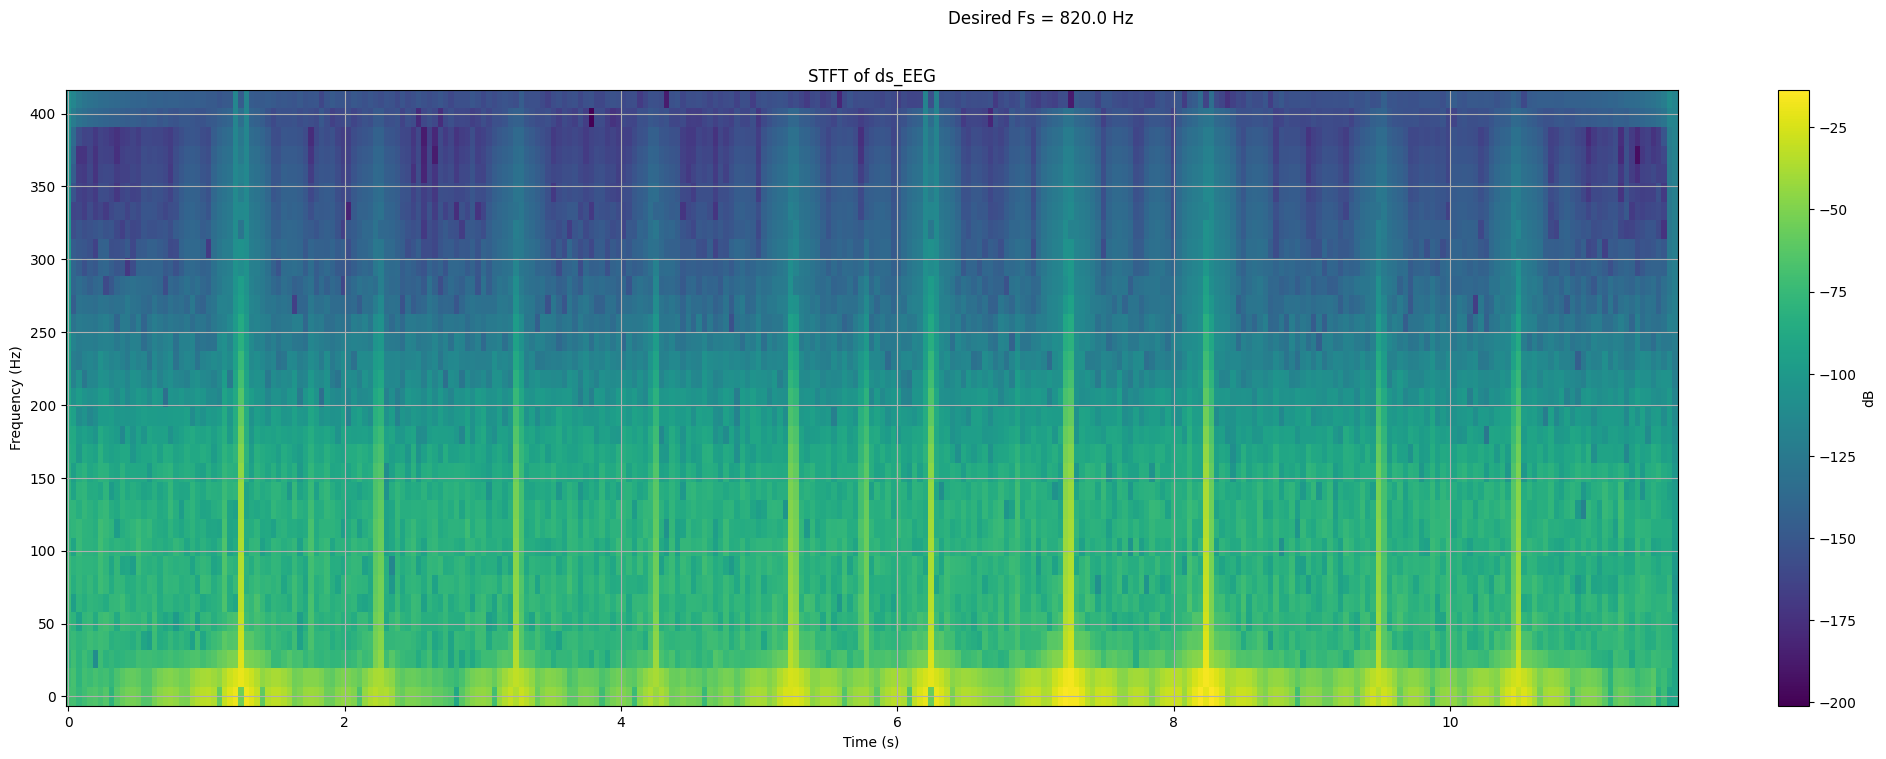

In [57]:
#d
M = [8] # factor downsample
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    t = np.arange(0,len(signal)) / fs

    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    filtered_signal = lfilter(b, a, signal)

    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure()
    dft = fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'k', label="Original Signal (NFFT = {})".format(len(signal)), lw=2)

    dft = fft(downsampled_signal)
    freq = np.fft.fftfreq(len(downsampled_signal), 1/desired_fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Downsampled Signal (NFFT = {})".format(len(downsampled_signal)), lw=1.5)

    NFFT0 = len(downsampled_signal)
    NFFTs = [NFFT0//2, NFFT0//4, NFFT0//8]

    for NFFT in NFFTs:
        EEG_ds2 = np.zeros(NFFT0)
        EEG_ds2[:NFFT] = downsampled_signal[:NFFT]
        dft_ds_EEG = fft(EEG_ds2, NFFT0)
        freq_ds_EEG = np.fft.fftfreq(len(dft_ds_EEG), 1/desired_fs)
        positive_freq_indices = np.where(freq_ds_EEG >= 0)
        plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), label="Downsampled Signal (NFFT = {})".format(NFFT))

    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()